In [152]:
import pandas as pd
import seaborn as sns
import altair as alt
from matplotlib import pyplot as plt

# Location distribution by years in Ukraine and abroad

## Data preparation

In [153]:
df_students = pd.read_csv('../tables_creation/final_tables/students.csv', dtype={'KATOTTG_2023': str, 'EDRPOU_school': str})
print(df_students.columns)

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_53831/1910047717.py:1: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_students = pd.read_csv('../tables_creation/final_tables/students.csv', dtype={'KATOTTG_2023': str, 'EDRPOU_school': str})


Index(['outid', 'birth', 'sextypename', 'classprofilename', 'regtypename',
       'classlangname', 'KATOTTG_2023', 'EDRPOU_school', 'year', 'status'],
      dtype='object')


In [154]:
df_students = df_students[['outid', 'birth', 'sextypename', 'KATOTTG_2023', 'year', 'EDRPOU_school', 'status']]
df_students

,outid,birth,sextypename,KATOTTG_2023,year,EDRPOU_school,status
0,a99c6c63-aa70-4aec-ba42-370f7261e857,1998,Male,UA23080270010078454,2016,26373098,A graduate of an Ukrainian school of the curre...
1,c3136421-569e-422e-ae8f-41c4c931fd70,1998,Female,UA68040210010032567,2016,25880114,A graduate of an Ukrainian school of the curre...
2,30de395e-7a74-452a-8370-6856d240fbfb,1999,Male,UA73060610010033137,2016,21431046,A graduate of an Ukrainian school of the curre...
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,1999,Female,UA14120030010055241,2016,25705061,A graduate of an Ukrainian school of the curre...
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,1999,Male,UA61040490010069060,2016,14040173,A graduate of an Ukrainian school of the curre...
...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,2003,Male,UA59020070010054283,2023,NaN,A graduate of previous years
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,1996,Female,UA32100010010059200,2023,NaN,A graduate of previous years
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,2004,Female,UA56080170010061049,2023,NaN,A graduate of previous years
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,2005,Female,UA51100270010320268,2023,NaN,A graduate of previous years


In [155]:
df_students['age'] = df_students['year']-df_students['birth']
df_students.drop('birth', axis = 1, inplace=True)
df_students

,outid,sextypename,KATOTTG_2023,year,EDRPOU_school,status,age
0,a99c6c63-aa70-4aec-ba42-370f7261e857,Male,UA23080270010078454,2016,26373098,A graduate of an Ukrainian school of the curre...,18
1,c3136421-569e-422e-ae8f-41c4c931fd70,Female,UA68040210010032567,2016,25880114,A graduate of an Ukrainian school of the curre...,18
2,30de395e-7a74-452a-8370-6856d240fbfb,Male,UA73060610010033137,2016,21431046,A graduate of an Ukrainian school of the curre...,17
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,Female,UA14120030010055241,2016,25705061,A graduate of an Ukrainian school of the curre...,17
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,Male,UA61040490010069060,2016,14040173,A graduate of an Ukrainian school of the curre...,17
...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,Male,UA59020070010054283,2023,NaN,A graduate of previous years,20
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,Female,UA32100010010059200,2023,NaN,A graduate of previous years,27
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,Female,UA56080170010061049,2023,NaN,A graduate of previous years,19
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,Female,UA51100270010320268,2023,NaN,A graduate of previous years,18


In [156]:
df_students[df_students.EDRPOU_school=='22335988']

,outid,sextypename,KATOTTG_2023,year,EDRPOU_school,status,age
3495,0fac36bb-be05-40a8-9592-3208429b2567,Male,UA46060250010457177,2016,22335988,A graduate of an Ukrainian school of the curre...,18
4217,6aa8a0b1-bbcd-4076-b574-e2ff21fdad43,Female,UA46060250010457177,2016,22335988,A graduate of an Ukrainian school of the curre...,17
10246,4d5fa7d9-9bca-4ecf-9873-ccf835d2bd43,Male,UA46060250010457177,2016,22335988,A graduate of an Ukrainian school of the curre...,17
16636,8ce16587-f399-4141-94cf-ef319afde6dd,Male,UA46060250010457177,2016,22335988,A graduate of an Ukrainian school of the curre...,17
18064,832a6085-07ad-4917-80eb-a312c21d725f,Female,UA46060250010457177,2016,22335988,A graduate of an Ukrainian school of the curre...,17
...,...,...,...,...,...,...,...
2107782,98e5bfa3-df3f-46fb-818d-47e2c9b63bad,Male,UA46060250010457177,2023,22335988,A graduate of an Ukrainian school of the curre...,17
2112221,98e78850-a0eb-4b0b-8bad-ed3c36c27d34,Female,UA46060250010457177,2023,22335988,A graduate of an Ukrainian school of the curre...,18
2113718,98f6819b-b671-4fa0-947f-ed9a6fca2e31,Female,UA46060250010457177,2023,22335988,A graduate of an Ukrainian school of the curre...,17
2114323,98d796c0-7587-4048-8933-1e219006e385,Female,UA46060250010457177,2023,22335988,A graduate of an Ukrainian school of the curre...,17


In [6]:
df_students[df_students.KATOTTG_2023.isna()]

,outid,sextypename,KATOTTG_2023,year,EDRPOU_school,status,age


In [7]:
df_location = pd.read_csv('../tables_creation/final_tables/locations_base.csv', dtype={'KOATUU_2020': str, 'KATOTTG_2023': str})
df_location = df_location.drop_duplicates(subset=['KATOTTG_2023'], keep='first')
df_location.head()

,KATOTTG_2023,KOATUU_2020,category,ukrainian_name,english_name
0,UA01000000000013043,0100000000,region,Автономна Республіка Крим,Avtonomna Respublika Krym
1,UA01020000000022387,0120400000,district,Бахчисарайський,Bakhchysaraiskyi
2,UA01020010000048857,8536990200,hromada,Андріївська,NaN
3,UA01020010010075540,8536990201,village,Андріївка,NaN
4,UA01020010020030666,8536990203,settlement,Сонячний,NaN


In [8]:
region_df=df_location[df_location.category.isin(['region', 'capital'])][['KATOTTG_2023', 'english_name']]
region_df['KATOTTG_2023_region'] = region_df['KATOTTG_2023'].str[:4]
region_df.drop(columns='KATOTTG_2023', inplace=True)
region_df.reset_index(inplace=True, drop=True)
region_df

,english_name,KATOTTG_2023_region
0,Avtonomna Respublika Krym,UA01
1,Vinnytska,UA05
2,Volynska,UA07
3,Dnipropetrovska,UA12
4,Donetska,UA14
5,Zhytomyrskа,UA18
6,Zakarpatska,UA21
7,Zaporizka,UA23
8,Ivano-Frankivska,UA26
9,Kyivska,UA32


In [9]:
abroad_df=df_location[(df_location.category=='abroad')&(df_location.KATOTTG_2023.str[4:6]=='00')][['KATOTTG_2023', 'english_name']]
abroad_df['KATOTTG_2023_region'] = abroad_df['KATOTTG_2023'].str[:4]
abroad_df.drop(columns='KATOTTG_2023', inplace=True)
abroad_df.reset_index(inplace=True, drop=True)
abroad_df

,english_name,KATOTTG_2023_region
0,Ireland,OC01
1,Spain,OC02
2,Italy,OC03
3,Azerbaijan,OC04
4,Austia,OC05
5,Belgium,OC06
6,Bulgaria,OC07
7,United Kingdom,OC08
8,Greece,OC09
9,Georgia,OC10


In [10]:
df_students_region = df_students.merge(df_location[['KATOTTG_2023', 'category']], on = ['KATOTTG_2023'], how = 'left')
df_students_region['KATOTTG_2023_region']=df_students_region['KATOTTG_2023'].str[:4]
df_students_region

,outid,sextypename,KATOTTG_2023,year,EDRPOU_school,status,age,category,KATOTTG_2023_region
0,a99c6c63-aa70-4aec-ba42-370f7261e857,Male,UA23080270010078454,2016,26373098,A graduate of an Ukrainian school of the curre...,18,village,UA23
1,c3136421-569e-422e-ae8f-41c4c931fd70,Female,UA68040210010032567,2016,25880114,A graduate of an Ukrainian school of the curre...,18,city,UA68
2,30de395e-7a74-452a-8370-6856d240fbfb,Male,UA73060610010033137,2016,21431046,A graduate of an Ukrainian school of the curre...,17,city,UA73
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,Female,UA14120030010055241,2016,25705061,A graduate of an Ukrainian school of the curre...,17,city,UA14
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,Male,UA61040490010069060,2016,14040173,A graduate of an Ukrainian school of the curre...,17,city,UA61
...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,Male,UA59020070010054283,2023,NaN,A graduate of previous years,20,city,UA59
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,Female,UA32100010010059200,2023,NaN,A graduate of previous years,27,city,UA32
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,Female,UA56080170010061049,2023,NaN,A graduate of previous years,19,city,UA56
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,Female,UA51100270010320268,2023,NaN,A graduate of previous years,18,districts in cities,UA51


In [11]:
df_students_region = df_students_region.merge(region_df, on = ['KATOTTG_2023_region'], how = 'left')
df_students_region 

,outid,sextypename,KATOTTG_2023,year,EDRPOU_school,status,age,category,KATOTTG_2023_region,english_name
0,a99c6c63-aa70-4aec-ba42-370f7261e857,Male,UA23080270010078454,2016,26373098,A graduate of an Ukrainian school of the curre...,18,village,UA23,Zaporizka
1,c3136421-569e-422e-ae8f-41c4c931fd70,Female,UA68040210010032567,2016,25880114,A graduate of an Ukrainian school of the curre...,18,city,UA68,Khmelnytska
2,30de395e-7a74-452a-8370-6856d240fbfb,Male,UA73060610010033137,2016,21431046,A graduate of an Ukrainian school of the curre...,17,city,UA73,Chernivetska
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,Female,UA14120030010055241,2016,25705061,A graduate of an Ukrainian school of the curre...,17,city,UA14,Donetska
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,Male,UA61040490010069060,2016,14040173,A graduate of an Ukrainian school of the curre...,17,city,UA61,Ternopilska
...,...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,Male,UA59020070010054283,2023,NaN,A graduate of previous years,20,city,UA59,Sumska
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,Female,UA32100010010059200,2023,NaN,A graduate of previous years,27,city,UA32,Kyivska
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,Female,UA56080170010061049,2023,NaN,A graduate of previous years,19,city,UA56,Rivnenska
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,Female,UA51100270010320268,2023,NaN,A graduate of previous years,18,districts in cities,UA51,Odeska


In [12]:
df_students_region = df_students_region.merge(abroad_df, on = ['KATOTTG_2023_region'], how = 'left')
df_students_region 

,outid,sextypename,KATOTTG_2023,year,EDRPOU_school,status,age,category,KATOTTG_2023_region,english_name_x,english_name_y
0,a99c6c63-aa70-4aec-ba42-370f7261e857,Male,UA23080270010078454,2016,26373098,A graduate of an Ukrainian school of the curre...,18,village,UA23,Zaporizka,NaN
1,c3136421-569e-422e-ae8f-41c4c931fd70,Female,UA68040210010032567,2016,25880114,A graduate of an Ukrainian school of the curre...,18,city,UA68,Khmelnytska,NaN
2,30de395e-7a74-452a-8370-6856d240fbfb,Male,UA73060610010033137,2016,21431046,A graduate of an Ukrainian school of the curre...,17,city,UA73,Chernivetska,NaN
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,Female,UA14120030010055241,2016,25705061,A graduate of an Ukrainian school of the curre...,17,city,UA14,Donetska,NaN
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,Male,UA61040490010069060,2016,14040173,A graduate of an Ukrainian school of the curre...,17,city,UA61,Ternopilska,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,Male,UA59020070010054283,2023,NaN,A graduate of previous years,20,city,UA59,Sumska,NaN
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,Female,UA32100010010059200,2023,NaN,A graduate of previous years,27,city,UA32,Kyivska,NaN
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,Female,UA56080170010061049,2023,NaN,A graduate of previous years,19,city,UA56,Rivnenska,NaN
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,Female,UA51100270010320268,2023,NaN,A graduate of previous years,18,districts in cities,UA51,Odeska,NaN


In [13]:
df_students_region.loc[df_students_region.english_name_x.isna(), 'english_name_x'] =df_students_region.english_name_y

In [14]:
df_students_region.drop(columns='english_name_y', inplace=True)
df_students_region.rename(columns={'english_name_x':'region_name'}, inplace=True)
df_students_region

,outid,sextypename,KATOTTG_2023,year,EDRPOU_school,status,age,category,KATOTTG_2023_region,region_name
0,a99c6c63-aa70-4aec-ba42-370f7261e857,Male,UA23080270010078454,2016,26373098,A graduate of an Ukrainian school of the curre...,18,village,UA23,Zaporizka
1,c3136421-569e-422e-ae8f-41c4c931fd70,Female,UA68040210010032567,2016,25880114,A graduate of an Ukrainian school of the curre...,18,city,UA68,Khmelnytska
2,30de395e-7a74-452a-8370-6856d240fbfb,Male,UA73060610010033137,2016,21431046,A graduate of an Ukrainian school of the curre...,17,city,UA73,Chernivetska
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,Female,UA14120030010055241,2016,25705061,A graduate of an Ukrainian school of the curre...,17,city,UA14,Donetska
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,Male,UA61040490010069060,2016,14040173,A graduate of an Ukrainian school of the curre...,17,city,UA61,Ternopilska
...,...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,Male,UA59020070010054283,2023,NaN,A graduate of previous years,20,city,UA59,Sumska
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,Female,UA32100010010059200,2023,NaN,A graduate of previous years,27,city,UA32,Kyivska
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,Female,UA56080170010061049,2023,NaN,A graduate of previous years,19,city,UA56,Rivnenska
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,Female,UA51100270010320268,2023,NaN,A graduate of previous years,18,districts in cities,UA51,Odeska


In [15]:
df_students_region[df_students_region.region_name.isna()]

,outid,sextypename,KATOTTG_2023,year,EDRPOU_school,status,age,category,KATOTTG_2023_region,region_name


In [16]:
df_students_region.region_name.unique()

array(['Zaporizka', 'Khmelnytska', 'Chernivetska', 'Donetska',
       'Ternopilska', 'Kirovohradska', 'Odeska', 'Dnipropetrovska',
       'Lvivska', 'Ivano-Frankivska', 'Kharkivska', 'Cherkaska',
       'Volynska', 'Poltavska', 'Rivnenska', 'Vinnytska', 'Chernihivska',
       'Kyivska', 'Zakarpatska', 'Kyiv', 'Zhytomyrskа', 'Mykolaivska',
       'Khersonska', 'Luhanska', 'Sumska', 'Poland', 'France', 'Germany',
       'Estonia', 'Norway', 'Slovakia', 'Austia', 'United Kingdom',
       'Ireland', 'Bulgaria', 'Moldova', 'Portugal', 'Azerbaijan',
       'Hungary', 'Italy', 'Turkey', 'Czechia', 'Belgium', 'Spain',
       'Canada', 'Croatia', 'Latvia', 'Romania', 'Lithuania', 'Georgia',
       'United States of America', 'Finland', 'Sweden', 'Luxembourg',
       'Netherlands', 'Denmark', 'Switzerland'], dtype=object)

In [17]:
df_students_region['abroad'] = df_students_region['KATOTTG_2023_region'].map(lambda x: 1 if x[:2] == 'OC' else 0)
df_students_region.drop(['KATOTTG_2023', 'KATOTTG_2023_region'], axis = 1, inplace=True)
df_students_region

,outid,sextypename,year,EDRPOU_school,status,age,category,region_name,abroad
0,a99c6c63-aa70-4aec-ba42-370f7261e857,Male,2016,26373098,A graduate of an Ukrainian school of the curre...,18,village,Zaporizka,0
1,c3136421-569e-422e-ae8f-41c4c931fd70,Female,2016,25880114,A graduate of an Ukrainian school of the curre...,18,city,Khmelnytska,0
2,30de395e-7a74-452a-8370-6856d240fbfb,Male,2016,21431046,A graduate of an Ukrainian school of the curre...,17,city,Chernivetska,0
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,Female,2016,25705061,A graduate of an Ukrainian school of the curre...,17,city,Donetska,0
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,Male,2016,14040173,A graduate of an Ukrainian school of the curre...,17,city,Ternopilska,0
...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,Male,2023,NaN,A graduate of previous years,20,city,Sumska,0
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,Female,2023,NaN,A graduate of previous years,27,city,Kyivska,0
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,Female,2023,NaN,A graduate of previous years,19,city,Rivnenska,0
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,Female,2023,NaN,A graduate of previous years,18,districts in cities,Odeska,0


In [18]:
pivot = pd.pivot_table(df_students_region, index = ['sextypename'], columns = ['year'], values=['outid'], aggfunc='count')
pivot

outid                                                        
year           2016    2017    2018    2019    2020    2021    2022    2023
sextypename                                                                
Female       141626  127637  168582  175647  187488  193073  122311  148941
Male         126376  113252  167105  178166  191811  196250  111793  139994

In [19]:
total_pivot = [len(df_students_region[df_students_region['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                       
year         2016  2017 2018 2019  2020 2021  2022  2023
sextypename                                             
Female       0.53  0.53  0.5  0.5  0.49  0.5  0.52  0.52
Male         0.47  0.47  0.5  0.5  0.51  0.5  0.48  0.48

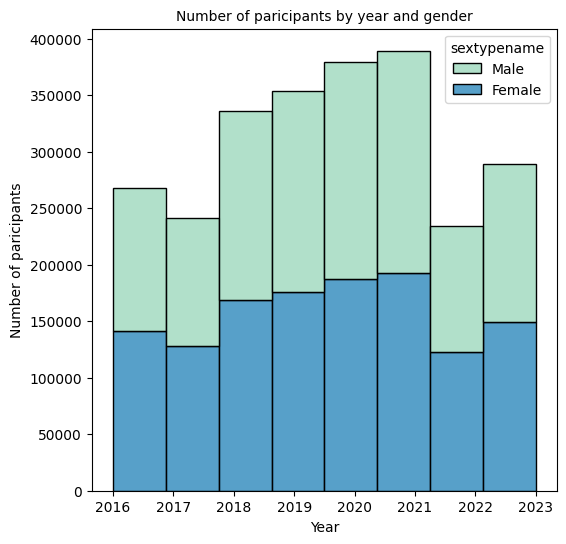

In [20]:
# set size of plot
plt.figure(figsize=(6, 6))

# viz as stack plot
sns.histplot(data=df_students_region, x='year', hue='sextypename', multiple='stack', palette='YlGnBu', shrink=1, bins=8)
plt.title('Number of paricipants by year and gender', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of paricipants', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

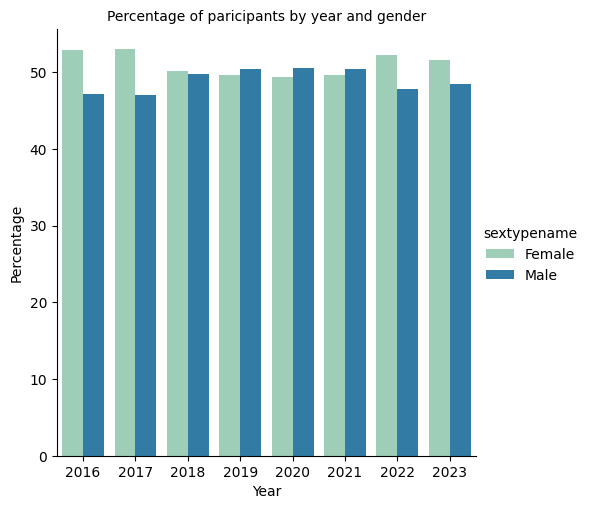

In [21]:
x,y = 'year', 'sextypename'

df_students_region.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title('Percentage of paricipants by year and gender', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [22]:
df_students_region['is_frontline'] = df_students_region.region_name.map(lambda x: 'yes' if x in ['Dnipropetrovska', 'Donetska', 'Zaporizka', 'Luhanska', 'Mykolaivska', 'Odeska', 'Sumska', 'Kharkivska', 'Khersonska'] else 'no')

In [23]:
df_students_region

,outid,sextypename,year,EDRPOU_school,status,age,category,region_name,abroad,is_frontline
0,a99c6c63-aa70-4aec-ba42-370f7261e857,Male,2016,26373098,A graduate of an Ukrainian school of the curre...,18,village,Zaporizka,0,yes
1,c3136421-569e-422e-ae8f-41c4c931fd70,Female,2016,25880114,A graduate of an Ukrainian school of the curre...,18,city,Khmelnytska,0,no
2,30de395e-7a74-452a-8370-6856d240fbfb,Male,2016,21431046,A graduate of an Ukrainian school of the curre...,17,city,Chernivetska,0,no
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,Female,2016,25705061,A graduate of an Ukrainian school of the curre...,17,city,Donetska,0,yes
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,Male,2016,14040173,A graduate of an Ukrainian school of the curre...,17,city,Ternopilska,0,no
...,...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,Male,2023,NaN,A graduate of previous years,20,city,Sumska,0,yes
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,Female,2023,NaN,A graduate of previous years,27,city,Kyivska,0,no
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,Female,2023,NaN,A graduate of previous years,19,city,Rivnenska,0,no
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,Female,2023,NaN,A graduate of previous years,18,districts in cities,Odeska,0,yes


In [24]:
pivot = pd.pivot_table(df_students_region, index = ['is_frontline'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(df_students_region[df_students_region['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                          
year          2016  2017  2018  2019  2020  2021  2022  2023
is_frontline                                                
no            0.61  0.61  0.61  0.61  0.61  0.61  0.66  0.69
yes           0.39  0.39  0.39  0.39  0.39  0.39  0.34  0.31

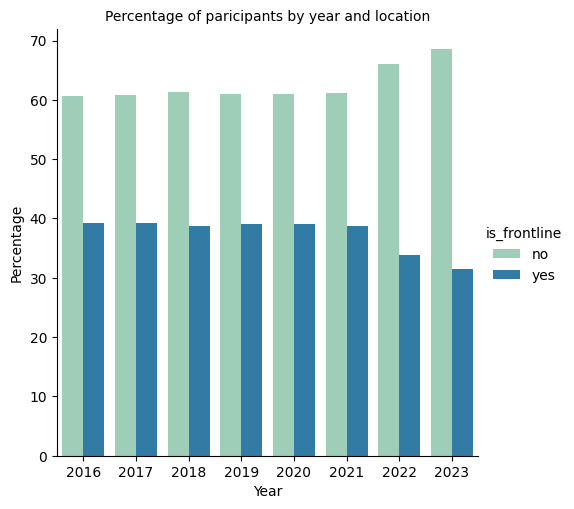

In [25]:
x,y = 'year', 'is_frontline'

df_students_region.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title('Percentage of paricipants by year and location', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [26]:
pivot = pd.pivot_table(df_students_region, index = ['category'], columns = ['year'], values=['outid'], aggfunc='count')
pivot

outid                                                   \
year                    2016     2017      2018      2019      2020      2021   
category                                                                        
abroad                   NaN      NaN       NaN       NaN       NaN       NaN   
city                 79382.0  75328.0  128282.0  136204.0  143390.0  146191.0   
districts in cities  79806.0  76950.0  117117.0  126803.0  134833.0  137999.0   
settlement            1774.0   1217.0    1282.0    1260.0    1502.0    1457.0   
urban village        21913.0  21385.0   26873.0   27765.0   30312.0   31515.0   
village              85127.0  66009.0   62133.0   61781.0   69262.0   72161.0   

                                        
year                    2022      2023  
category                                
abroad                   NaN    3694.0  
city                 85391.0  113320.0  
districts in cities  85432.0  109226.0  
settlement             591.0     518.0  
urban village        18778.0   20429.0  
village              43912.0   41748.0

In [27]:
total_pivot = [len(df_students_region[df_students_region['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                          
year                 2016  2017  2018  2019  2020  2021  2022  2023
category                                                           
abroad                NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.01
city                 0.30  0.31  0.38  0.38  0.38  0.38  0.36  0.39
districts in cities  0.30  0.32  0.35  0.36  0.36  0.35  0.36  0.38
settlement           0.01  0.01  0.00  0.00  0.00  0.00  0.00  0.00
urban village        0.08  0.09  0.08  0.08  0.08  0.08  0.08  0.07
village              0.32  0.27  0.19  0.17  0.18  0.19  0.19  0.14

In [28]:
df_students_region.category = df_students_region.category.map(lambda x: 'village' if x == 'settlement' or x == 'urban village' else x)

In [29]:
pivot = pd.pivot_table(df_students_region, index = ['category'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(df_students_region[df_students_region['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                          
year                 2016  2017  2018  2019  2020  2021  2022  2023
category                                                           
abroad                NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.01
city                 0.30  0.31  0.38  0.38  0.38  0.38  0.36  0.39
districts in cities  0.30  0.32  0.35  0.36  0.36  0.35  0.36  0.38
village              0.41  0.37  0.27  0.26  0.27  0.27  0.27  0.22

In [30]:
df_students_region['is_rural'] = df_students_region.category.map(lambda x: 'yes' if x == 'village' else 'no')

In [31]:
pivot = pd.pivot_table(df_students_region, index = ['is_rural'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(df_students_region[df_students_region['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                          
year      2016  2017  2018  2019  2020  2021  2022  2023
is_rural                                                
no        0.59  0.63  0.73  0.74  0.73  0.73  0.73  0.78
yes       0.41  0.37  0.27  0.26  0.27  0.27  0.27  0.22

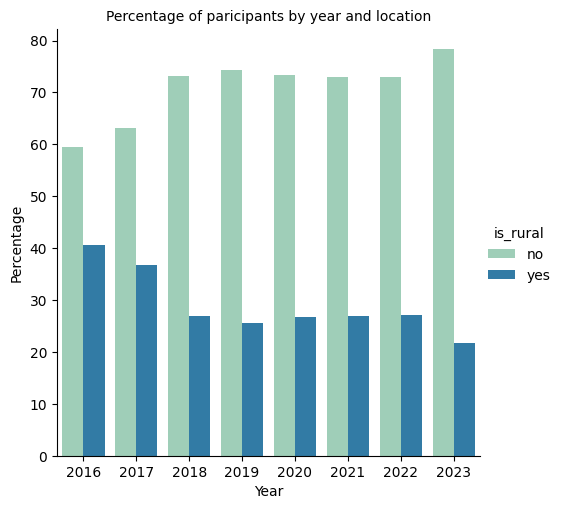

In [32]:
x,y = 'year', 'is_rural'

df_students_region.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title('Percentage of paricipants by year and location', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [33]:
df_students_region

,outid,sextypename,year,EDRPOU_school,status,age,category,region_name,abroad,is_frontline,is_rural
0,a99c6c63-aa70-4aec-ba42-370f7261e857,Male,2016,26373098,A graduate of an Ukrainian school of the curre...,18,village,Zaporizka,0,yes,yes
1,c3136421-569e-422e-ae8f-41c4c931fd70,Female,2016,25880114,A graduate of an Ukrainian school of the curre...,18,city,Khmelnytska,0,no,no
2,30de395e-7a74-452a-8370-6856d240fbfb,Male,2016,21431046,A graduate of an Ukrainian school of the curre...,17,city,Chernivetska,0,no,no
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,Female,2016,25705061,A graduate of an Ukrainian school of the curre...,17,city,Donetska,0,yes,no
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,Male,2016,14040173,A graduate of an Ukrainian school of the curre...,17,city,Ternopilska,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,Male,2023,NaN,A graduate of previous years,20,city,Sumska,0,yes,no
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,Female,2023,NaN,A graduate of previous years,27,city,Kyivska,0,no,no
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,Female,2023,NaN,A graduate of previous years,19,city,Rivnenska,0,no,no
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,Female,2023,NaN,A graduate of previous years,18,districts in cities,Odeska,0,yes,no


In [34]:
df_st_take_test = pd.read_csv('../tables_creation/final_tables/students_take_tests.csv',  dtype={'KATOTTG_2023_test_center': str, 'EDRPOU_test_center':str})
# df_st_take_test.dropna(subset = ['KOATUU_2020_test_center'], inplace=True)
df_st_take_test = df_st_take_test[df_st_take_test.test_status != 'Not registered for the main session']
df_st_take_test

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362
...,...,...,...,...,...,...,...,...,...,...
10597971,fffdecee-6adc-4de9-9f11-3895f6652b99,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA21120250010053148,26325975
10597972,fffed487-0571-4dc2-93e8-c9fbc293c02d,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA74040250010023991,02125668
10597973,ffff3ae9-5e83-4c92-bdec-d080cc49b1b6,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48060150010139573,05537288
10597974,ffff820f-d5d0-4e38-814e-7e958770e85b,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48020190010089719,26117159


In [35]:
df_st_take_test.columns

Index(['outid', 'year', 'score100', 'score12', 'score', 'test_status',
       'test_subject', 'test_type', 'KATOTTG_2023_test_center',
       'EDRPOU_test_center'],
      dtype='object')

In [36]:
df = df_st_take_test.merge(df_students_region, on = ['outid', 'year'], how = 'left')
df

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,sextypename,EDRPOU_school,status,age,category,region_name,abroad,is_frontline,is_rural
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,Female,23864660,A graduate of an Ukrainian school of the curre...,17,districts in cities,Odeska,0,yes,no
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,Male,22056432,A graduate of an Ukrainian school of the curre...,17,village,Zhytomyrskа,0,no,yes
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,Male,05538052,A graduate of a vocational pre-higher educatio...,19,districts in cities,Cherkaska,0,no,no
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,Male,23320374,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kharkivska,0,yes,no
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,Male,20773804,A graduate of an Ukrainian school of the curre...,17,city,Lvivska,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8260196,fffdecee-6adc-4de9-9f11-3895f6652b99,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA21120250010053148,26325975,Female,26325886,A graduate of an Ukrainian school of the curre...,17,city,Zakarpatska,0,no,no
8260197,fffed487-0571-4dc2-93e8-c9fbc293c02d,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA74040250010023991,02125668,Female,33439420,A graduate of an Ukrainian school of the curre...,17,city,Chernihivska,0,no,no
8260198,ffff3ae9-5e83-4c92-bdec-d080cc49b1b6,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48060150010139573,05537288,Female,02546140,A graduate of a vocational pre-higher educatio...,24,village,Mykolaivska,0,yes,yes
8260199,ffff820f-d5d0-4e38-814e-7e958770e85b,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48020190010089719,26117159,Male,02545991,A graduate of a vocational pre-higher educatio...,18,village,Mykolaivska,0,yes,yes


## Analysis by subject

In [37]:
subj= pd.pivot_table(df, index = ['test_subject'], columns = ['year'], values=['outid'], aggfunc='count')

total = [len(df[df['year']==year].outid.unique()) for year in range(2016, 2024)]

subj.div(total).round(2)

outid                                         
year          2016  2017  2018  2019  2020  2021 2022  2023
test_subject                                               
biotest       0.29  0.37  0.25  0.23  0.30  0.33  NaN  0.14
chemtest      0.11  0.10  0.07  0.04  0.04  0.03  NaN  0.01
deutest       0.01  0.01  0.01  0.01  0.01  0.01  NaN  0.01
engtest       0.32  0.35  0.27  0.27  0.31  0.38  NaN  0.30
fratest       0.00  0.00  0.00  0.00  0.00  0.00  NaN  0.00
geotest       0.21  0.31  0.24  0.23  0.35  0.45  NaN   NaN
histtest      0.72  0.76  0.50  0.66  0.70  0.77  1.0  0.53
mathsttest     NaN   NaN   NaN   NaN   NaN  0.20  NaN   NaN
mathtest      0.49  0.47  0.33  0.45  0.49  0.75  1.0  1.00
phystest      0.12  0.11  0.07  0.07  0.07  0.08  NaN  0.02
rustest       0.01  0.01   NaN   NaN   NaN   NaN  NaN   NaN
spatest       0.00  0.00  0.00  0.00  0.00  0.00  NaN  0.00
ukrtest       1.00  1.00  0.99  0.99  0.97  0.96  1.0  1.00
umltest        NaN   NaN   NaN   NaN   NaN  0.64  NaN   NaN

### Math

In [38]:
df_math = df[df.test_subject == 'mathtest']
sum(df_math.duplicated())

0

In [39]:
df_math.head()

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,sextypename,EDRPOU_school,status,age,category,region_name,abroad,is_frontline,is_rural
4181284,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,mathtest,EIE,UA18060090010074365,22050043,Male,22056432,A graduate of an Ukrainian school of the curre...,17,village,Zhytomyrskа,0,no,yes
4181285,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,181.0,11.0,NaN,Accepted,mathtest,EIE,UA63120270010948820,02071197,Male,23320374,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kharkivska,0,yes,no
4181286,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,172.0,9.0,42.0,Accepted,mathtest,EIE,UA46100230010074173,02545471,Male,20773804,A graduate of an Ukrainian school of the curre...,17,city,Lvivska,0,no,no
4181287,0000333c-efa3-42a7-9f45-e77b53346d57,2020,117.0,5.0,14.0,Accepted,mathtest,EIE,UA14120090010038661,25704570,Male,04601943,A graduate of a vocational pre-higher educatio...,18,city,Donetska,0,yes,no
4181288,00004713-8ed1-4ffa-a082-b6b3acf03b67,2020,103.0,4.0,10.0,Accepted,mathtest,EIE,UA46060250010515336,25245257,Male,02545659,A graduate of a vocational pre-higher educatio...,19,districts in cities,Lvivska,0,no,no


In [40]:
pd.pivot_table(df_math, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')

outid                                        \
year                      2016     2017     2018      2019      2020   
test_status                                                            
Absent                  9117.0   6795.0   5539.0    5463.0   33991.0   
Accepted              104797.0  88814.0  86692.0  127093.0  132734.0   
Canceled                 142.0     57.0    111.0     117.0      34.0   
Failed                 18108.0  17454.0  19681.0   28109.0   19313.0   
Not selected 100-200       NaN      NaN      NaN       NaN       NaN   

                                                    
year                      2021      2022      2023  
test_status                                         
Absent                 47247.0   19997.0   20716.0  
Accepted              168369.0  213805.0  256741.0  
Canceled                 208.0      33.0      91.0  
Failed                 75833.0     269.0   11387.0  
Not selected 100-200     132.0       NaN       NaN

In [41]:
df_math = df_math[~df_math.test_status.isin(['Absent', 'Not selected 100-200'])]
df_math

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,sextypename,EDRPOU_school,status,age,category,region_name,abroad,is_frontline,is_rural
4181285,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,181.0,11.0,NaN,Accepted,mathtest,EIE,UA63120270010948820,02071197,Male,23320374,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kharkivska,0,yes,no
4181286,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,172.0,9.0,42.0,Accepted,mathtest,EIE,UA46100230010074173,02545471,Male,20773804,A graduate of an Ukrainian school of the curre...,17,city,Lvivska,0,no,no
4181287,0000333c-efa3-42a7-9f45-e77b53346d57,2020,117.0,5.0,14.0,Accepted,mathtest,EIE,UA14120090010038661,25704570,Male,04601943,A graduate of a vocational pre-higher educatio...,18,city,Donetska,0,yes,no
4181288,00004713-8ed1-4ffa-a082-b6b3acf03b67,2020,103.0,4.0,10.0,Accepted,mathtest,EIE,UA46060250010515336,25245257,Male,02545659,A graduate of a vocational pre-higher educatio...,19,districts in cities,Lvivska,0,no,no
4181289,000051f8-9476-49b5-83c2-4797a201b706,2021,133.0,6.0,21.0,Accepted,mathtest,EIE,UA46120090010078401,22375166,Female,22375255,A graduate of an Ukrainian school of the curre...,18,village,Lvivska,0,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5700267,ffff8e58-5322-4b21-a385-d1fee504c2a8,2021,122.0,5.0,16.0,Accepted,mathtest,EIE,UA51040010010048834,00728546,Male,25417118,A graduate of an Ukrainian school of the curre...,17,city,Odeska,0,yes,no
5700268,ffffb2e5-b2a1-4f51-871b-d281c20e72e8,2019,104.0,4.0,12.0,Accepted,mathtest,EIE,UA32080090010037585,25668443,Male,25667248,A graduate of an Ukrainian school of the curre...,17,village,Kyivska,0,no,yes
5700270,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,128.0,NaN,5.0,Accepted,mathtest,NMT,UA18080150010017476,NaN,Female,00727989,A graduate of a vocational pre-higher educatio...,17,village,Zhytomyrskа,0,no,yes
5700271,ffffeeb2-7258-4465-bca3-88dd19902340,2019,180.0,10.0,46.0,Accepted,mathtest,EIE,UA12020010010639502,26508368,Male,26509416,A graduate of an Ukrainian school of the curre...,17,districts in cities,Dnipropetrovska,0,yes,no


In [42]:
# def convert_not_selected(row):
#     if row['test_status'] == 'Not selected 100-200':
#         return 'Failed' if row['score12'] <= 2 else 'Accepted'
#     if row['test_status'] == 'Canceled':
#         return 'Failed'
#     return row['test_status']

# df_math['test_status'] = df_math[['test_status', 'score12']].apply(convert_not_selected, axis=1)
df_math['test_status'] = df_math['test_status'].map(lambda x: 'Failed' if x == 'Canceled' else x)

In [43]:
pivot = pd.pivot_table(df_math, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')
pivot

outid                                                      
year           2016   2017   2018    2019    2020    2021    2022    2023
test_status                                                              
Accepted     104797  88814  86692  127093  132734  168369  213805  256741
Failed        18250  17511  19792   28226   19347   76041     302   11478

In [44]:
total_pivot = [len(df_math[df_math['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                         
year         2016  2017  2018  2019  2020  2021 2022  2023
test_status                                               
Accepted     0.85  0.84  0.81  0.82  0.87  0.69  1.0  0.96
Failed       0.15  0.16  0.19  0.18  0.13  0.31  0.0  0.04

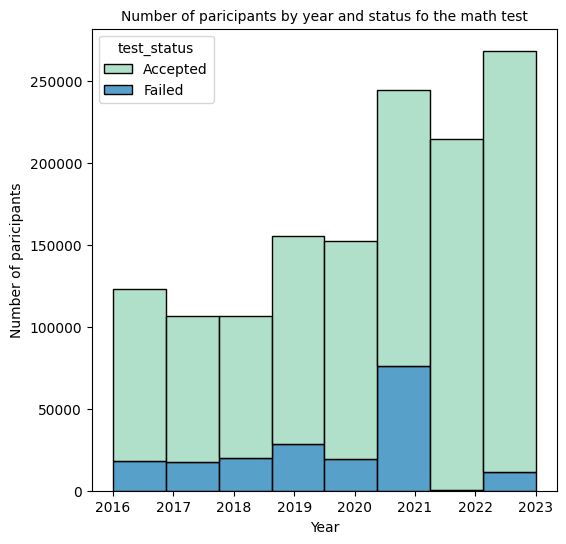

In [45]:
# set size of plot
plt.figure(figsize=(6, 6))

# viz as stack plot
sns.histplot(data=df_math, x='year', hue='test_status', multiple='stack', palette='YlGnBu', shrink=1, bins=8)
plt.title('Number of paricipants by year and status fo the math test', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of paricipants', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

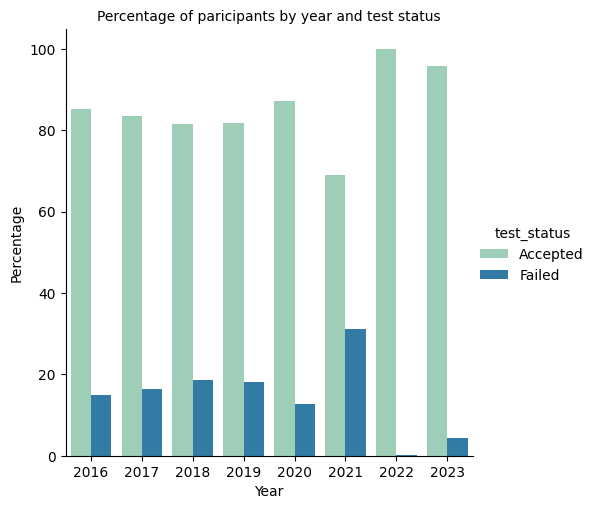

In [46]:
x,y = 'year', 'test_status'

df_math.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title('Percentage of paricipants by year and test status', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

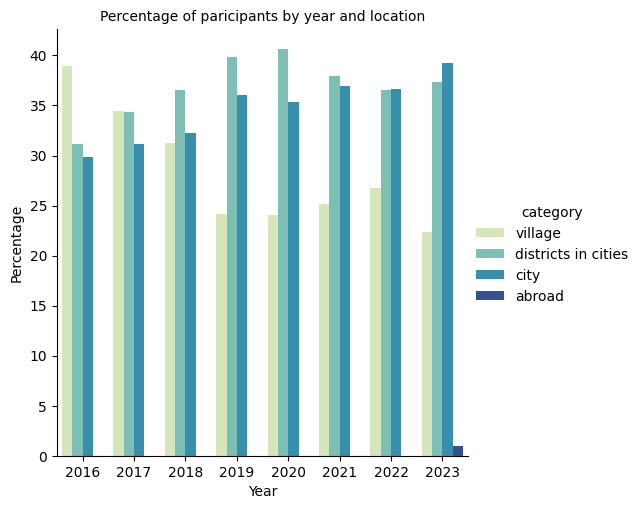

In [47]:
x,y = 'year', 'category'

df_math.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title('Percentage of paricipants by year and location', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

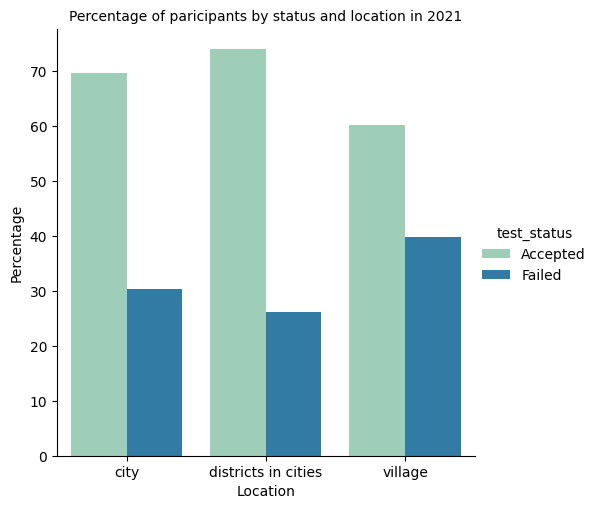

In [48]:
x,y = 'category', 'test_status'
year = 2021
df_math[df_math.year==year].groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title(f'Percentage of paricipants by status and location in {year}', fontsize=10)
plt.xlabel('Location', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

PISA2018: In Ukraine, girls scored similar to boys in mathematics. 

In [49]:
# dct = {'гімназія':'school', 
#        'навчально-виховний комплекс':'school', 
#        'заклад вищої освіти':'prof',
#        'вище професійне училище':'prof', 
#        'середня загальноосвітня школа':'school',
#        'ліцей':'school', 
#        'спеціалізована школа':'school',
#        'спеціалізована школа-інтернат':'school',
#        'заклад фахової передвищої освіти':'prof',
#        'професійний ліцей відповідного профілю':'school',
#        'заклад професійної (професійно-технічної) освіти':'prof',
#        "навчально-виховне об'єднання":'school', 
#        'колегіум':'school',
#        'центр професійної освіти':'prof',
#        'професійно-технічне училище відповідного профілю':'prof',
#        'центр професійно-технічної освіти':'prof',
#        'загальноосвітня санаторна школа':'school',
#        'вищий навчальний заклад I-II рівнів акредитації':'prof',
#        'вечірня (змінна) школа':'school', 
#        'середня загальноосвітня школа-інтернат':'school',
#        'науковий ліцей':'school', 
#        'колегіум/колеж':'school',
#        'центр підготовки і перепідготовки робітничих кадрів':'prof', 
#        'коледж':'prof',
#        'ліцей із посиленою військово-фізичною підготовкою':'school',
#        'спеціальна загальноосвітня школа':'school',
#        'військовий (військово-морський, військово-спортивний) ліцей':'school',
#        'колеж':'school', 
#        'спеціальна загальноосвітня школа-інтернат':'school',
#        'вище художнє професійно-технічне училище':'prof', 
#        'спортивний ліцей':'school',
#        'Пеніціарна установа':'school', 
#        'спеціальна школа':'school', 
#        'мистецький ліцей':'school',
#        'навчально-реабілітаційний центр':'school', 
#        'Пенітенціарна установа':'school',
#        'школа соціальної реабілітації':'school',
#        'вищий навчальний заклад III-IV рівнів акредитації':'univ',
#        'початкова школа':'school'}

In [50]:
# for old_name, new_name in dct.items():
#     df_math.loc[df_math.eotypename==old_name, 'eotypename'] = new_name

22.465175361164338 13.580006629040463
1.959963984540054
3.090232306167813


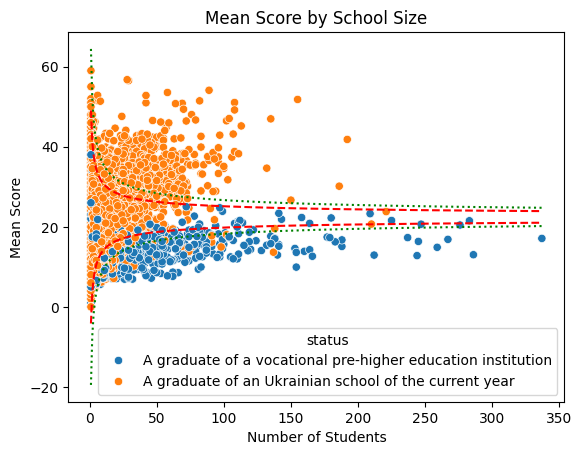

20.15596581196581 14.741676401249771
1.959963984540054
3.090232306167813


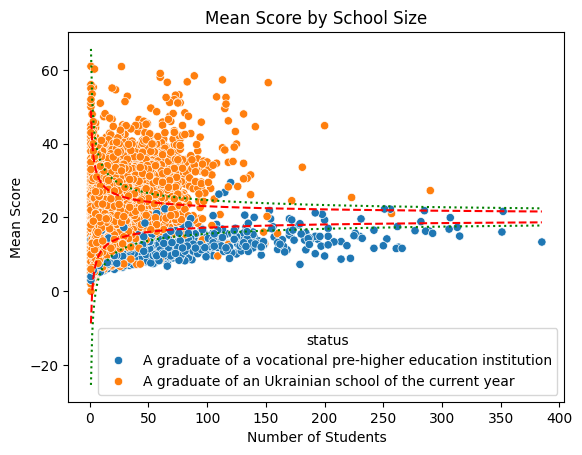

14.665151699230183 7.8350857721083225
1.959963984540054
3.090232306167813


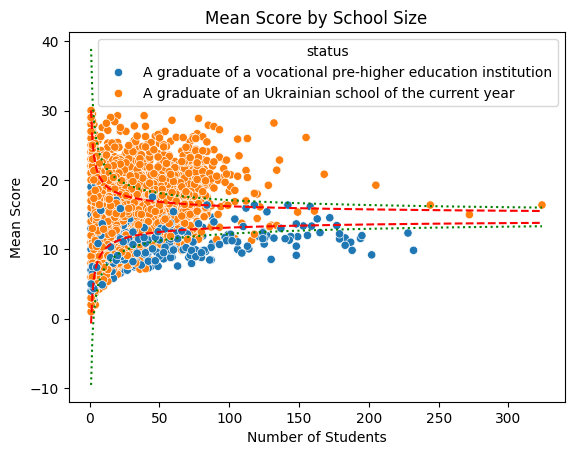

12.418055967033855 7.225035966372407
1.959963984540054
3.090232306167813


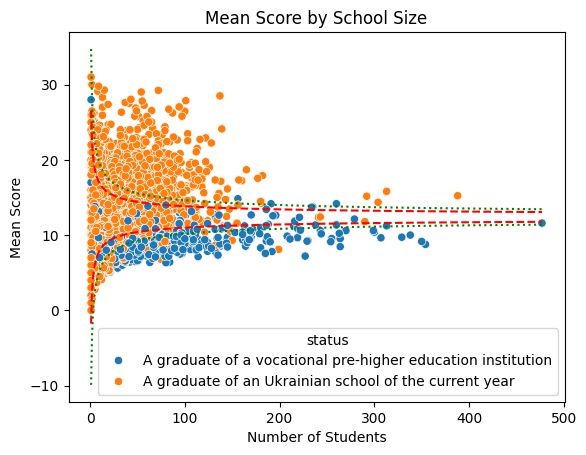

In [51]:
import numpy as np
import scipy.stats as stats
for year in [2020, 2021, 2022, 2023]:
    df_math_year=df_math[(df_math['year'] == year)&(df_math.score.notna())&(df_math.status!='The institution of punishment')]

    grouped = df_math_year.groupby(['EDRPOU_school', 'status'])['score'].agg(['mean', 'count', 'std']).reset_index()
    grouped.rename(columns={'mean': 'mean_score', 'count': 'student_count', 'std': 'std_dev'}, inplace=True)

    student_counts = df_math_year['EDRPOU_school'].value_counts()
    df_math_year = df_math_year.merge(student_counts.rename('student_count'), left_on='EDRPOU_school', right_index=True)

    # Group by 'student_count' and calculate mean score, standard deviation and number of schools
    aggregated = df_math_year.groupby('student_count')['score'].agg(['mean', 'std', 'count']).reset_index()
    aggregated = aggregated[aggregated.student_count <500]
    # Function to calculate confidence interval margin
    def calculate_confidence_interval_margin(std_dev, n, confidence_level):
        z = stats.norm.ppf(confidence_level)
        print(z)
        return z * (std_dev/np.sqrt(n))

    mean = df_math_year[df_math_year.student_count <500].score.mean()
    std = df_math_year[df_math_year.student_count <500].score.std()

    print(mean, std)
    # aggregated['margin_95'] = calculate_confidence_interval_margin(aggregated['std'], aggregated['student_count'], 0.975)  # 0.975 for 95% confidence interval
    # aggregated['margin_998'] = calculate_confidence_interval_margin(aggregated['std'], aggregated['student_count'], 0.999)  # 0.999 for 99.8% confidence interval
    aggregated['margin_95'] = calculate_confidence_interval_margin(std, aggregated['student_count'], 0.975)  # 0.975 for 95% confidence interval
    aggregated['margin_998'] = calculate_confidence_interval_margin(std, aggregated['student_count'], 0.999)  # 0.999 for 99.8% confidence interval

    # Create scatter plot
    # plt.scatter(grouped['student_count'], grouped['mean_score'])
    sns.scatterplot(grouped[grouped.student_count <500], x='student_count', y="mean_score", hue='status')

    # sns.lineplot(data=grouped[grouped.student_count <800], x="student_count", y="margin_95")
    plt.plot(aggregated['student_count'], mean + aggregated['margin_95'], 'r--', label='95% Confidence Interval')
    plt.plot(aggregated['student_count'], mean - aggregated['margin_95'], 'r--')
    plt.plot(aggregated['student_count'], mean + aggregated['margin_998'], 'g:', label='99.8% Confidence Interval')
    plt.plot(aggregated['student_count'], mean - aggregated['margin_998'], 'g:')



    # Adding labels and title for clarity
    plt.xlabel('Number of Students')
    plt.ylabel('Mean Score')
    plt.title('Mean Score by School Size')

    # Show the plot
    plt.show()

13.238819320214668 7.526866633211563
1.959963984540054
3.090232306167813


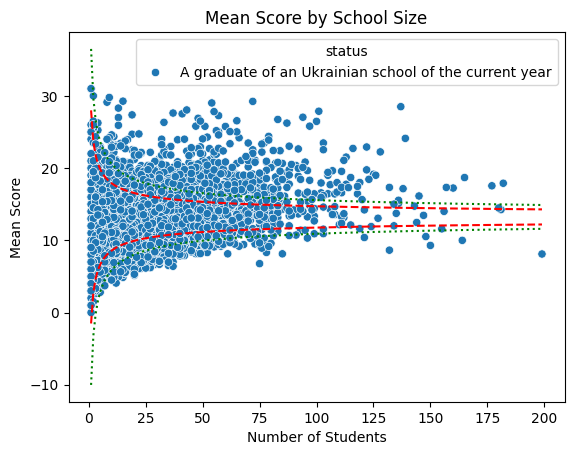

In [170]:
year = 2023
df_math_year=df_math[(df_math['year'] == year)&(df_math.score.notna())&(df_math.status=='A graduate of an Ukrainian school of the current year')]

grouped = df_math_year.groupby(['EDRPOU_school', 'status'])['score'].agg(['mean', 'count', 'std']).reset_index()
grouped.rename(columns={'mean': 'mean_score', 'count': 'student_count', 'std': 'std_dev'}, inplace=True)

student_counts = df_math_year['EDRPOU_school'].value_counts()
df_math_year = df_math_year.merge(student_counts.rename('student_count'), left_on='EDRPOU_school', right_index=True)

# Group by 'student_count' and calculate mean score, standard deviation and number of schools
aggregated = df_math_year.groupby('student_count')['score'].agg(['mean', 'std', 'count']).reset_index()
aggregated = aggregated[aggregated.student_count <200]
# Function to calculate confidence interval margin
def calculate_confidence_interval_margin(std_dev, n, confidence_level):
    z = stats.norm.ppf(confidence_level)
    print(z)
    return z * (std_dev/np.sqrt(n))

mean = df_math_year[df_math_year.student_count <200].score.mean()
std = df_math_year[df_math_year.student_count <200].score.std()

print(mean, std)
# aggregated['margin_95'] = calculate_confidence_interval_margin(aggregated['std'], aggregated['student_count'], 0.975)  # 0.975 for 95% confidence interval
# aggregated['margin_998'] = calculate_confidence_interval_margin(aggregated['std'], aggregated['student_count'], 0.999)  # 0.999 for 99.8% confidence interval
aggregated['margin_95'] = calculate_confidence_interval_margin(std, aggregated['student_count'], 0.975)  # 0.975 for 95% confidence interval
aggregated['margin_998'] = calculate_confidence_interval_margin(std, aggregated['student_count'], 0.999)  # 0.999 for 99.8% confidence interval

# Create scatter plot
# plt.scatter(grouped['student_count'], grouped['mean_score'])
sns.scatterplot(grouped[grouped.student_count <200], x='student_count', y="mean_score", hue='status')

# sns.lineplot(data=grouped[grouped.student_count <800], x="student_count", y="margin_95")
plt.plot(aggregated['student_count'], mean + aggregated['margin_95'], 'r--', label='95% Confidence Interval')
plt.plot(aggregated['student_count'], mean - aggregated['margin_95'], 'r--')
plt.plot(aggregated['student_count'], mean + aggregated['margin_998'], 'g:', label='99.8% Confidence Interval')
plt.plot(aggregated['student_count'], mean - aggregated['margin_998'], 'g:')



# Adding labels and title for clarity
plt.xlabel('Number of Students')
plt.ylabel('Mean Score')
plt.title('Mean Score by School Size')

# Show the plot
plt.show()

In [ ]:
aggregated[(aggregated.student_count>18)]

In [174]:
df_math_year[df_math_year.EDRPOU_school=='39382856'].score100.mean()

152.18691588785046

In [175]:
df_math_year[df_math_year.EDRPOU_school=='39382856']

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,sextypename,EDRPOU_school,status,age,category,region_name,abroad,is_frontline,is_rural,student_count
4915949,98d718a4-a135-4ad9-8524-85bf91b696fc,2023,163.0,NaN,25.0,Accepted,mathtest,NMT,OC30020000000000000,NaN,Female,39382856,A graduate of an Ukrainian school of the curre...,17,districts in cities,Kyiv,0,no,no,1452
4915986,98d721d6-23fa-47f3-bffe-caab492bea50,2023,153.0,NaN,21.0,Accepted,mathtest,NMT,OC19060000000000000,NaN,Male,39382856,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kyiv,0,no,no,1452
4915999,98d72566-57b3-4d8c-a6ff-8b017a8b0785,2023,153.0,NaN,21.0,Accepted,mathtest,NMT,UA80000000000875983,NaN,Female,39382856,A graduate of an Ukrainian school of the curre...,16,districts in cities,Kyiv,0,no,no,1452
4916019,98d72803-db57-4682-abd7-88bbf9298141,2023,143.0,NaN,13.0,Accepted,mathtest,NMT,OC21020000000000000,NaN,Female,39382856,A graduate of an Ukrainian school of the curre...,17,districts in cities,Kyiv,0,no,no,1452
4916053,98d72c7f-3933-4384-8736-31c56ab6eb57,2023,150.0,NaN,18.0,Accepted,mathtest,NMT,UA80000000000210193,NaN,Male,39382856,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kyiv,0,no,no,1452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204534,995636fc-12e0-4299-ade7-d9527b975c2e,2023,152.0,NaN,20.0,Accepted,mathtest,NMT,UA32020010010081183,NaN,Male,39382856,A graduate of an Ukrainian school of the curre...,17,districts in cities,Kyiv,0,no,no,1452
5204612,9956466e-b908-46c5-81d7-16ab08fa8479,2023,107.0,NaN,5.0,Accepted,mathtest,NMT,UA80000000001078669,NaN,Male,39382856,A graduate of an Ukrainian school of the curre...,17,districts in cities,Kyiv,0,no,no,1452
5206272,995c93b6-a1f4-42f1-ba1e-2b5bfbe3f6c5,2023,126.0,NaN,8.0,Accepted,mathtest,NMT,UA80000000000336424,NaN,Female,39382856,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kyiv,0,no,no,1452
5206798,99609802-ec08-43bb-8ca8-f7e645f533ac,2023,149.0,NaN,17.0,Accepted,mathtest,NMT,UA80000000000479391,NaN,Female,39382856,A graduate of an Ukrainian school of the curre...,16,districts in cities,Kyiv,0,no,no,1452


In [55]:
# year = 2023
# import numpy as np
# import scipy.stats as stats

# df_math_year=df_math[(df_math['year'] == year)&(df_math.score.notna())]

# grouped = df_math_year.groupby('EDRPOU_school')['score'].agg(['mean', 'count', 'std']).reset_index()
# grouped.rename(columns={'mean': 'mean_score', 'count': 'student_count', 'std': 'std_dev'}, inplace=True)

# student_counts = df_math_year['EDRPOU_school'].value_counts()
# df_math_year = df_math_year.merge(student_counts.rename('student_count'), left_on='EDRPOU_school', right_index=True)

# # Group by 'student_count' and calculate mean score, standard deviation and number of schools
# aggregated = df_math_year.groupby('student_count')['score'].agg(['mean', 'std', 'count']).reset_index()
# aggregated = aggregated[aggregated.student_count <400]
# # Overall mean proportion
# aggregated['proportion'] = aggregated['count'] / aggregated['count'].sum()

# prop = df_math_year.score.sum()/df_math_year.shape[0]/50
# print(prop)
# mean_proportion = aggregated['proportion'].mean()

# # Standard Error
# # SE = np.sqrt(mean_proportion * (1 - mean_proportion) / aggregated['student_count'])
# SE = np.sqrt(prop * (1 - prop) / aggregated['student_count'])
# # Confidence limits
# z_95 = stats.norm.ppf(0.975)  # Z-score for 80% confidence interval
# z_99 = stats.norm.ppf(0.999)  # Z-score for 95% confidence interval

# upper_95 = prop + z_95 * SE
# lower_95 = prop - z_95 * SE
# upper_99 = prop + z_99 * SE
# lower_99 = prop - z_99 * SE
# # Create scatter plot
# # plt.scatter(grouped['student_count'], grouped['mean_score'])
# sns.scatterplot(grouped[grouped.student_count <400], x='student_count', y="mean_score")
# # Plotting the funnel plot
# # plt.scatter(aggregated['student_count'], aggregated['proportion'], color='blue')
# plt.plot(aggregated['student_count'], 50*upper_95, 'r--', label='95% Confidence Interval')
# plt.plot(aggregated['student_count'], 50*lower_95, 'r--')
# plt.plot(aggregated['student_count'], 50*upper_99, 'g:', label='99% Confidence Interval')
# plt.plot(aggregated['student_count'], 50*lower_99, 'g:')

# plt.xlabel('Student Count')
# plt.ylabel('Proportion of Schools')
# plt.title('Funnel Plot with 95% and 99% Confidence Limits')
# plt.legend()
# plt.show()

## Ukrainian

In [56]:
df_ukr = df[df.test_subject == 'ukrtest']
sum(df_ukr.duplicated())

0

In [57]:
pd.pivot_table(df_ukr, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')

outid                                          \
year                      2016      2017      2018      2019      2020   
test_status                                                              
Absent                 13187.0    9992.0    9815.0    9980.0   95071.0   
Accepted              230634.0  212569.0  276433.0  286413.0  251929.0   
Canceled                 145.0     254.0     327.0     527.0      29.0   
Failed                 23033.0   17137.0   46598.0   52445.0   22525.0   
Not selected 100-200       NaN       NaN       NaN       NaN       NaN   

                                                    
year                      2021      2022      2023  
test_status                                         
Absent                 83321.0   19997.0   20716.0  
Accepted              267635.0  213927.0  267871.0  
Canceled                  93.0      33.0      91.0  
Failed                 21202.0     147.0     257.0  
Not selected 100-200    1712.0       NaN       NaN

In [58]:
# df_ukr = df_ukr[~df_ukr.test_status.isin(['Absent', 'Not selected 100-200'])]
# df_ukr

In [59]:
# df_ukr['test_status'] = df_ukr['test_status'].map(lambda x: 'Failed' if x == 'Canceled' else x)

In [60]:
# pivot = pd.pivot_table(df_ukr, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')
# pivot

In [61]:
# total_pivot = [len(df_ukr[df_ukr['year']==year].outid.unique()) for year in range(2016, 2024)]

# pivot.div(total_pivot).round(2)

In [62]:
# # set size of plot
# plt.figure(figsize=(6, 6))

# # viz as stack plot
# sns.histplot(data=df_ukr, x='year', hue='test_status', multiple='stack', palette='YlGnBu', shrink=1, bins=8)
# plt.title('Number of paricipants by year and status fo the math test', fontsize=10)
# plt.xlabel('Year', fontsize=10)
# plt.ylabel('Number of paricipants', fontsize=10)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)

# plt.show()

In [63]:
# x,y = 'year', 'test_status'

# df_ukr.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

# plt.title('Percentage of paricipants by year and test status', fontsize=10)
# plt.xlabel('Year', fontsize=10)
# plt.ylabel('Percentage', fontsize=10)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)

# plt.show()

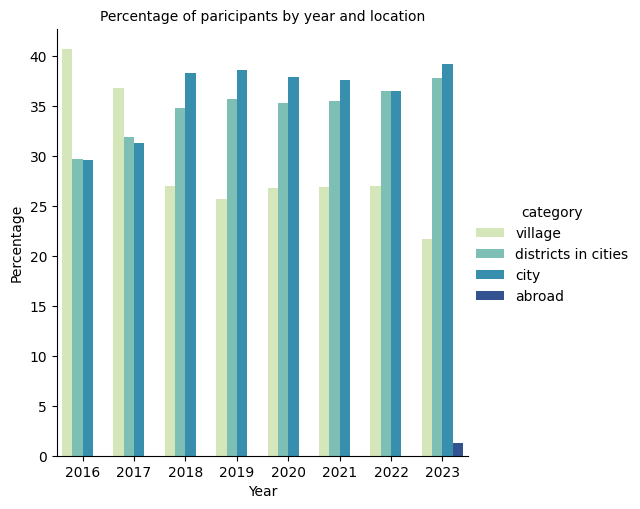

In [64]:
x,y = 'year', 'category'

df_ukr.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title('Percentage of paricipants by year and location', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

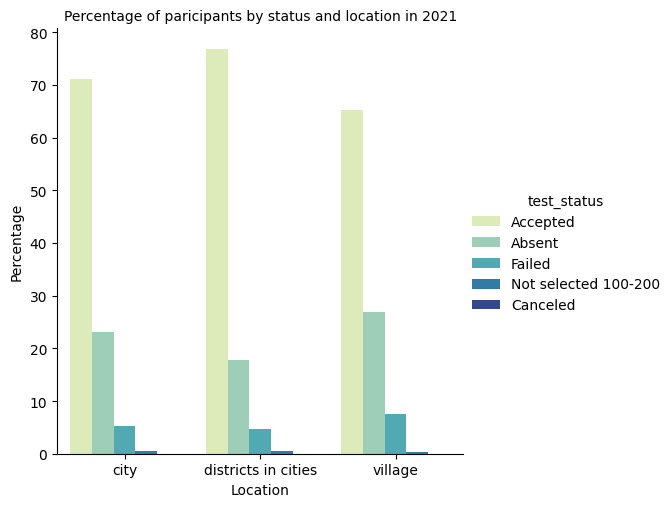

In [65]:
x,y = 'category', 'test_status'
year = 2021
df_ukr[df_ukr.year==year].groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title(f'Percentage of paricipants by status and location in {year}', fontsize=10)
plt.xlabel('Location', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [66]:
df[(df.test_subject=='mathtest')&(df.test_status=='Accepted')&(df.year==2018)&(df.age.isin([16,17]))].shape

(54826, 19)

Text(0.5, 0.98, 'Distribution of the scores of participants (16-17 years old) by test and gender in 2020')

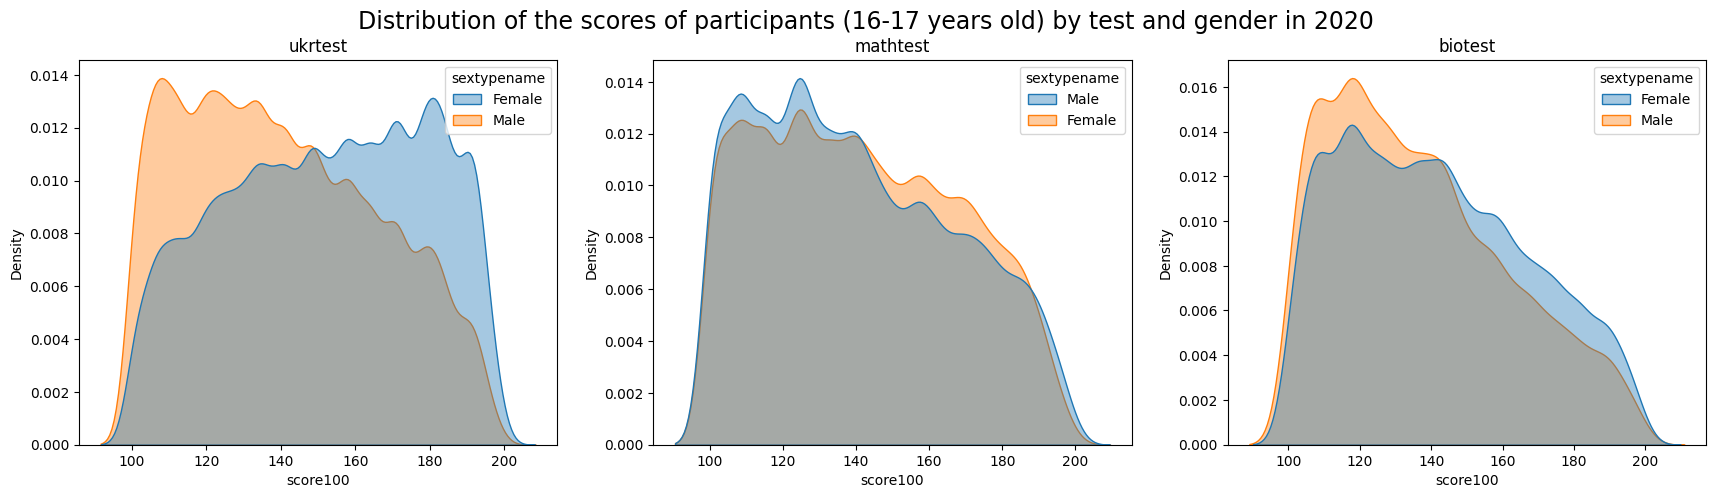

In [162]:
subjects = ['ukrtest', 'mathtest', 'biotest']
year = 2020

fig, axs = plt.subplots(ncols=3,figsize=(21,5))

for i, subject in enumerate(subjects):
    sns.kdeplot(data=df[(df.test_subject==subject)&(df.test_status=='Accepted')&(df.year==year)&(df.age.isin([16,17]))], x="score100", hue="sextypename", fill=True, common_norm=False, alpha=0.4, ax=axs[i])
    axs[i].set_title(f'{subject}')

plt.suptitle(f'Distribution of the scores of participants (16-17 years old) by test and gender in {year}', fontsize=17)

<div>
<img src="PISA2018.png" width="500"/>
</div>

Text(0.5, 0.98, 'Distribution of scores by test and location in 2021')

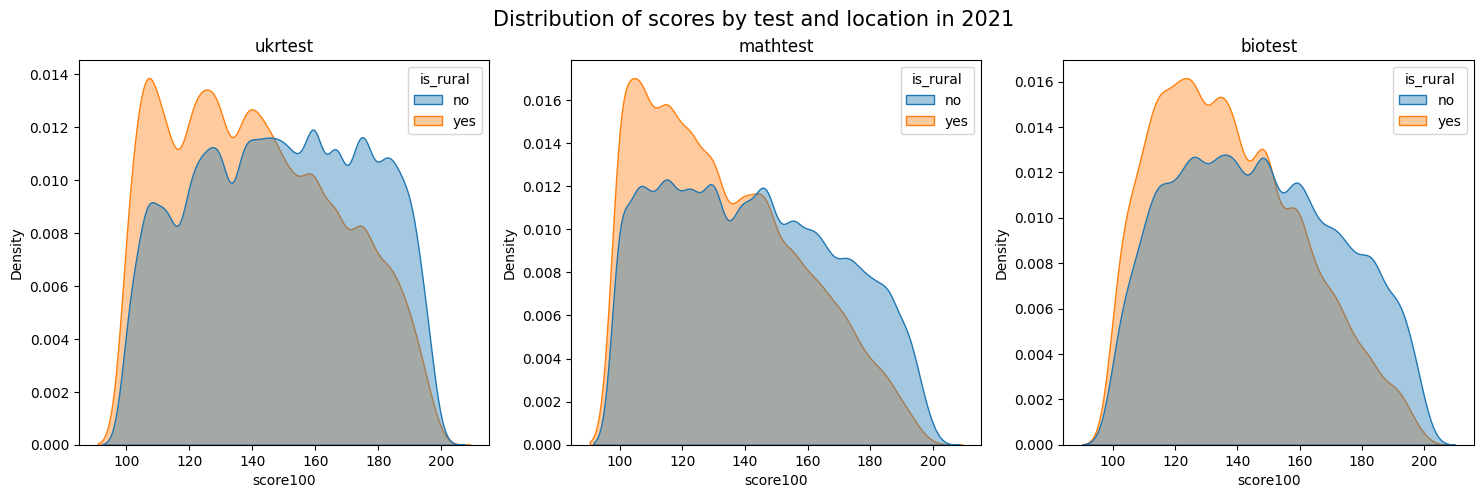

In [160]:
subjects = ['ukrtest', 'mathtest', 'biotest']
year = 2021

fig, axs = plt.subplots(ncols=3,figsize=(18,5))

for i, subject in enumerate(subjects):
    sns.kdeplot(data=df[(df.test_subject==subject)&(df.test_status=='Accepted')&(df.year==year)&(df.age.isin([16,17]))], x="score100", hue="is_rural", fill=True, common_norm=False, alpha=0.4, ax=axs[i])
    axs[i].set_title(f'{subject}')
    # axs[i].legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
# _ = fig.legend(bbox_to_anchor=(0.92, 0.5), loc="center left")

plt.suptitle(f'Distribution of scores by test and location in {year}', fontsize=15)

In [69]:
df_ukr.columns

Index(['outid', 'year', 'score100', 'score12', 'score', 'test_status',
       'test_subject', 'test_type', 'KATOTTG_2023_test_center',
       'EDRPOU_test_center', 'sextypename', 'EDRPOU_school', 'status', 'age',
       'category', 'region_name', 'abroad', 'is_frontline', 'is_rural'],
      dtype='object')

In [70]:
df_ukr[df_ukr.KATOTTG_2023_test_center.isna()]

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,sextypename,EDRPOU_school,status,age,category,region_name,abroad,is_frontline,is_rural


In [71]:
df_ukr

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,sextypename,EDRPOU_school,status,age,category,region_name,abroad,is_frontline,is_rural
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,Female,23864660,A graduate of an Ukrainian school of the curre...,17,districts in cities,Odeska,0,yes,no
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,Male,22056432,A graduate of an Ukrainian school of the curre...,17,village,Zhytomyrskа,0,no,yes
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,Male,05538052,A graduate of a vocational pre-higher educatio...,19,districts in cities,Cherkaska,0,no,no
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,Male,23320374,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kharkivska,0,yes,no
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,Male,20773804,A graduate of an Ukrainian school of the curre...,17,city,Lvivska,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456040,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,142.0,NaN,14.0,Accepted,ukrtest,NMT,UA18080150010017476,NaN,Female,00727989,A graduate of a vocational pre-higher educatio...,17,village,Zhytomyrskа,0,no,yes
2456041,ffffeeb2-7258-4465-bca3-88dd19902340,2019,169.0,10.0,70.0,Accepted,ukrtest,EIE,UA12020010010639502,26508368,Male,26509416,A graduate of an Ukrainian school of the curre...,17,districts in cities,Dnipropetrovska,0,yes,no
2456042,fffff6db-6fcc-481f-aa92-49906c0ad1c8,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA46060250010615203,02545659,Female,33195557,A graduate of a vocational pre-higher educatio...,18,districts in cities,Lvivska,0,no,no
2456043,fffff7dc-0331-41bb-aa5e-e51024ac605e,2021,128.0,NaN,31.0,Accepted,ukrtest,EIE,UA07080170010083384,23253324,Female,01566465,A graduate of a vocational pre-higher educatio...,17,city,Volynska,0,no,no


In [72]:
df_location_ukr = df_location.rename(columns={'KATOTTG_2023':'KATOTTG_2023_test_center', 'category':'category_test_center'})

In [73]:
df_ukr_region = df_ukr.merge(df_location_ukr[['KATOTTG_2023_test_center', 'category_test_center']], on = ['KATOTTG_2023_test_center'], how = 'left')
df_ukr_region['KATOTTG_2023_region_test_center']=df_ukr['KATOTTG_2023_test_center'].str[:4]
df_ukr_region

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,EDRPOU_school,status,age,category,region_name,abroad,is_frontline,is_rural,category_test_center,KATOTTG_2023_region_test_center
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,...,23864660,A graduate of an Ukrainian school of the curre...,17,districts in cities,Odeska,0,yes,no,districts in cities,UA51
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,...,22056432,A graduate of an Ukrainian school of the curre...,17,village,Zhytomyrskа,0,no,yes,city,UA18
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,...,05538052,A graduate of a vocational pre-higher educatio...,19,districts in cities,Cherkaska,0,no,no,districts in cities,UA71
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,...,23320374,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kharkivska,0,yes,no,districts in cities,UA63
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,...,20773804,A graduate of an Ukrainian school of the curre...,17,city,Lvivska,0,no,no,city,UA46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456040,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,142.0,NaN,14.0,Accepted,ukrtest,NMT,UA18080150010017476,NaN,...,00727989,A graduate of a vocational pre-higher educatio...,17,village,Zhytomyrskа,0,no,yes,city,UA18
2456041,ffffeeb2-7258-4465-bca3-88dd19902340,2019,169.0,10.0,70.0,Accepted,ukrtest,EIE,UA12020010010639502,26508368,...,26509416,A graduate of an Ukrainian school of the curre...,17,districts in cities,Dnipropetrovska,0,yes,no,districts in cities,UA12
2456042,fffff6db-6fcc-481f-aa92-49906c0ad1c8,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA46060250010615203,02545659,...,33195557,A graduate of a vocational pre-higher educatio...,18,districts in cities,Lvivska,0,no,no,districts in cities,UA46
2456043,fffff7dc-0331-41bb-aa5e-e51024ac605e,2021,128.0,NaN,31.0,Accepted,ukrtest,EIE,UA07080170010083384,23253324,...,01566465,A graduate of a vocational pre-higher educatio...,17,city,Volynska,0,no,no,city,UA07


In [74]:
region_df_ukr=df_location_ukr[df_location_ukr.category_test_center.isin(['region', 'capital'])][['KATOTTG_2023_test_center', 'english_name']]
region_df_ukr['KATOTTG_2023_region_test_center'] = region_df_ukr['KATOTTG_2023_test_center'].str[:4]
region_df_ukr.drop(columns='KATOTTG_2023_test_center', inplace=True)
region_df_ukr.reset_index(inplace=True, drop=True)
region_df_ukr

,english_name,KATOTTG_2023_region_test_center
0,Avtonomna Respublika Krym,UA01
1,Vinnytska,UA05
2,Volynska,UA07
3,Dnipropetrovska,UA12
4,Donetska,UA14
5,Zhytomyrskа,UA18
6,Zakarpatska,UA21
7,Zaporizka,UA23
8,Ivano-Frankivska,UA26
9,Kyivska,UA32


In [75]:
df_ukr_region = df_ukr_region.merge(region_df_ukr, on = ['KATOTTG_2023_region_test_center'], how = 'left')
df_ukr_region

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,status,age,category,region_name,abroad,is_frontline,is_rural,category_test_center,KATOTTG_2023_region_test_center,english_name
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,...,A graduate of an Ukrainian school of the curre...,17,districts in cities,Odeska,0,yes,no,districts in cities,UA51,Odeska
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,...,A graduate of an Ukrainian school of the curre...,17,village,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,...,A graduate of a vocational pre-higher educatio...,19,districts in cities,Cherkaska,0,no,no,districts in cities,UA71,Cherkaska
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,...,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kharkivska,0,yes,no,districts in cities,UA63,Kharkivska
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,...,A graduate of an Ukrainian school of the curre...,17,city,Lvivska,0,no,no,city,UA46,Lvivska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456040,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,142.0,NaN,14.0,Accepted,ukrtest,NMT,UA18080150010017476,NaN,...,A graduate of a vocational pre-higher educatio...,17,village,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа
2456041,ffffeeb2-7258-4465-bca3-88dd19902340,2019,169.0,10.0,70.0,Accepted,ukrtest,EIE,UA12020010010639502,26508368,...,A graduate of an Ukrainian school of the curre...,17,districts in cities,Dnipropetrovska,0,yes,no,districts in cities,UA12,Dnipropetrovska
2456042,fffff6db-6fcc-481f-aa92-49906c0ad1c8,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA46060250010615203,02545659,...,A graduate of a vocational pre-higher educatio...,18,districts in cities,Lvivska,0,no,no,districts in cities,UA46,Lvivska
2456043,fffff7dc-0331-41bb-aa5e-e51024ac605e,2021,128.0,NaN,31.0,Accepted,ukrtest,EIE,UA07080170010083384,23253324,...,A graduate of a vocational pre-higher educatio...,17,city,Volynska,0,no,no,city,UA07,Volynska


In [76]:
abroad_df_ukr=df_location_ukr[(df_location_ukr.category_test_center=='abroad')&(df_location_ukr.KATOTTG_2023_test_center.str[4:6]=='00')][['KATOTTG_2023_test_center', 'english_name']]
abroad_df_ukr['KATOTTG_2023_region_test_center'] = abroad_df_ukr['KATOTTG_2023_test_center'].str[:4]
abroad_df_ukr.drop(columns='KATOTTG_2023_test_center', inplace=True)
abroad_df_ukr.reset_index(inplace=True, drop=True)
abroad_df_ukr

,english_name,KATOTTG_2023_region_test_center
0,Ireland,OC01
1,Spain,OC02
2,Italy,OC03
3,Azerbaijan,OC04
4,Austia,OC05
5,Belgium,OC06
6,Bulgaria,OC07
7,United Kingdom,OC08
8,Greece,OC09
9,Georgia,OC10


In [77]:
df_ukr_region = df_ukr_region.merge(abroad_df_ukr, on = ['KATOTTG_2023_region_test_center'], how = 'left')
df_ukr_region 

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,age,category,region_name,abroad,is_frontline,is_rural,category_test_center,KATOTTG_2023_region_test_center,english_name_x,english_name_y
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,...,17,districts in cities,Odeska,0,yes,no,districts in cities,UA51,Odeska,NaN
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,...,17,village,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа,NaN
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,...,19,districts in cities,Cherkaska,0,no,no,districts in cities,UA71,Cherkaska,NaN
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,...,18,districts in cities,Kharkivska,0,yes,no,districts in cities,UA63,Kharkivska,NaN
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,...,17,city,Lvivska,0,no,no,city,UA46,Lvivska,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456040,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,142.0,NaN,14.0,Accepted,ukrtest,NMT,UA18080150010017476,NaN,...,17,village,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа,NaN
2456041,ffffeeb2-7258-4465-bca3-88dd19902340,2019,169.0,10.0,70.0,Accepted,ukrtest,EIE,UA12020010010639502,26508368,...,17,districts in cities,Dnipropetrovska,0,yes,no,districts in cities,UA12,Dnipropetrovska,NaN
2456042,fffff6db-6fcc-481f-aa92-49906c0ad1c8,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA46060250010615203,02545659,...,18,districts in cities,Lvivska,0,no,no,districts in cities,UA46,Lvivska,NaN
2456043,fffff7dc-0331-41bb-aa5e-e51024ac605e,2021,128.0,NaN,31.0,Accepted,ukrtest,EIE,UA07080170010083384,23253324,...,17,city,Volynska,0,no,no,city,UA07,Volynska,NaN


In [78]:
df_ukr_region.loc[df_ukr_region.english_name_x.isna(), 'english_name_x'] =df_ukr_region.english_name_y

In [79]:
df_ukr_region.drop(columns='english_name_y', inplace=True)
df_ukr_region.rename(columns={'english_name_x':'region_name_test_center'}, inplace=True)
df_ukr_region

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,status,age,category,region_name,abroad,is_frontline,is_rural,category_test_center,KATOTTG_2023_region_test_center,region_name_test_center
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,...,A graduate of an Ukrainian school of the curre...,17,districts in cities,Odeska,0,yes,no,districts in cities,UA51,Odeska
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,...,A graduate of an Ukrainian school of the curre...,17,village,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,...,A graduate of a vocational pre-higher educatio...,19,districts in cities,Cherkaska,0,no,no,districts in cities,UA71,Cherkaska
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,...,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kharkivska,0,yes,no,districts in cities,UA63,Kharkivska
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,...,A graduate of an Ukrainian school of the curre...,17,city,Lvivska,0,no,no,city,UA46,Lvivska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456040,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,142.0,NaN,14.0,Accepted,ukrtest,NMT,UA18080150010017476,NaN,...,A graduate of a vocational pre-higher educatio...,17,village,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа
2456041,ffffeeb2-7258-4465-bca3-88dd19902340,2019,169.0,10.0,70.0,Accepted,ukrtest,EIE,UA12020010010639502,26508368,...,A graduate of an Ukrainian school of the curre...,17,districts in cities,Dnipropetrovska,0,yes,no,districts in cities,UA12,Dnipropetrovska
2456042,fffff6db-6fcc-481f-aa92-49906c0ad1c8,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA46060250010615203,02545659,...,A graduate of a vocational pre-higher educatio...,18,districts in cities,Lvivska,0,no,no,districts in cities,UA46,Lvivska
2456043,fffff7dc-0331-41bb-aa5e-e51024ac605e,2021,128.0,NaN,31.0,Accepted,ukrtest,EIE,UA07080170010083384,23253324,...,A graduate of a vocational pre-higher educatio...,17,city,Volynska,0,no,no,city,UA07,Volynska


In [80]:
df_ukr_region['is_frontline_test_center'] = df_ukr_region.region_name_test_center.map(lambda x: 'yes' if x in ['Dnipropetrovska', 'Donetska', 'Zaporizka', 'Luhanska', 'Mykolaivska', 'Odeska', 'Sumska', 'Kharkivska', 'Khersonska'] else 'no')

In [81]:
df_ukr_region

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,age,category,region_name,abroad,is_frontline,is_rural,category_test_center,KATOTTG_2023_region_test_center,region_name_test_center,is_frontline_test_center
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,...,17,districts in cities,Odeska,0,yes,no,districts in cities,UA51,Odeska,yes
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,...,17,village,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа,no
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,...,19,districts in cities,Cherkaska,0,no,no,districts in cities,UA71,Cherkaska,no
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,...,18,districts in cities,Kharkivska,0,yes,no,districts in cities,UA63,Kharkivska,yes
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,...,17,city,Lvivska,0,no,no,city,UA46,Lvivska,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456040,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,142.0,NaN,14.0,Accepted,ukrtest,NMT,UA18080150010017476,NaN,...,17,village,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа,no
2456041,ffffeeb2-7258-4465-bca3-88dd19902340,2019,169.0,10.0,70.0,Accepted,ukrtest,EIE,UA12020010010639502,26508368,...,17,districts in cities,Dnipropetrovska,0,yes,no,districts in cities,UA12,Dnipropetrovska,yes
2456042,fffff6db-6fcc-481f-aa92-49906c0ad1c8,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA46060250010615203,02545659,...,18,districts in cities,Lvivska,0,no,no,districts in cities,UA46,Lvivska,no
2456043,fffff7dc-0331-41bb-aa5e-e51024ac605e,2021,128.0,NaN,31.0,Accepted,ukrtest,EIE,UA07080170010083384,23253324,...,17,city,Volynska,0,no,no,city,UA07,Volynska,no


In [130]:
df_ukr_region.columns

Index(['outid', 'year', 'score100', 'score12', 'score', 'test_status',
       'test_subject', 'test_type', 'KATOTTG_2023_test_center',
       'EDRPOU_test_center', 'sextypename', 'EDRPOU_school', 'status', 'age',
       'category', 'region_name', 'abroad', 'is_frontline', 'is_rural',
       'category_test_center', 'KATOTTG_2023_region_test_center',
       'region_name_test_center', 'is_frontline_test_center',
       'test_center_type'],
      dtype='object')

In [147]:
df_ukr_region['is_equal_location_test_center'] = (df_ukr_region.region_name_test_center == df_ukr_region.region_name) | \
    ((df_ukr_region.region_name_test_center == 'Kyiv') & (df_ukr_region.region_name == 'Kyivska')) | \
    ((df_ukr_region.region_name_test_center == 'Kyivska') & (df_ukr_region.region_name == 'Kyiv'))
df_ukr_region

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,region_name,abroad,is_frontline,is_rural,category_test_center,KATOTTG_2023_region_test_center,region_name_test_center,is_frontline_test_center,test_center_type,is_equal_location_test_center
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,...,Odeska,0,yes,no,districts in cities,UA51,Odeska,yes,frontline,True
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,...,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа,no,non-frontline,True
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,...,Cherkaska,0,no,no,districts in cities,UA71,Cherkaska,no,non-frontline,True
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,...,Kharkivska,0,yes,no,districts in cities,UA63,Kharkivska,yes,frontline,True
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,...,Lvivska,0,no,no,city,UA46,Lvivska,no,non-frontline,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456040,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,142.0,NaN,14.0,Accepted,ukrtest,NMT,UA18080150010017476,NaN,...,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа,no,non-frontline,True
2456041,ffffeeb2-7258-4465-bca3-88dd19902340,2019,169.0,10.0,70.0,Accepted,ukrtest,EIE,UA12020010010639502,26508368,...,Dnipropetrovska,0,yes,no,districts in cities,UA12,Dnipropetrovska,yes,frontline,True
2456042,fffff6db-6fcc-481f-aa92-49906c0ad1c8,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA46060250010615203,02545659,...,Lvivska,0,no,no,districts in cities,UA46,Lvivska,no,non-frontline,True
2456043,fffff7dc-0331-41bb-aa5e-e51024ac605e,2021,128.0,NaN,31.0,Accepted,ukrtest,EIE,UA07080170010083384,23253324,...,Volynska,0,no,no,city,UA07,Volynska,no,non-frontline,True


In [187]:
df_ukr_region[df_ukr_region.year == 2023].is_equal_location_test_center.value_counts(normalize=True)

is_equal_location_test_center
True     0.875796
False    0.124204
Name: proportion, dtype: float64

In [148]:
pivot = pd.pivot_table(df_ukr_region, index = ['is_equal_location_test_center'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(df_ukr_region[df_ukr_region['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                       
year                           2016  2017 2018 2019  2020 2021  2022  2023
is_equal_location_test_center                                             
False                          0.01  0.01  0.0  0.0  0.01  0.0  0.19  0.12
True                           0.99  0.99  1.0  1.0  0.99  1.0  0.81  0.88

In [149]:
pivot

outid                                          \
year                             2016    2017    2018    2019    2020    2021   
is_equal_location_test_center                                                   
False                            2026    1704    1125    1293    4038    1774   
True                           264973  238248  332048  348072  365516  372189   

                                               
year                             2022    2023  
is_equal_location_test_center                  
False                           45465   35887  
True                           188639  253048

In [151]:
df_ukr_region[(~df_ukr_region['is_equal_location_test_center'])&(df_ukr_region.year==2023)][['region_name', 'region_name_test_center']].value_counts().head(25)

region_name      region_name_test_center
Donetska         Dnipropetrovska            1943
Kyiv             Germany                    1247
Kharkivska       Germany                    1207
Kyiv             Poland                     1009
Kharkivska       Poland                      715
Dnipropetrovska  Poland                      689
Zaporizka        Poland                      581
Dnipropetrovska  Germany                     557
Odeska           Germany                     488
Khersonska       Mykolaivska                 436
Donetska         Germany                     422
                 Kyiv                        408
Zaporizka        Germany                     387
Khersonska       Poland                      351
Donetska         Poland                      347
Khersonska       Odeska                      282
                 Dnipropetrovska             276
Odeska           Poland                      275
Kyivska          Germany                     272
Kyiv             United King

In [82]:
data = df_ukr_region

In [83]:
pivot = pd.pivot_table(df_ukr_region, index = ['is_frontline_test_center'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(df_ukr_region[df_ukr_region['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                          
year                      2016  2017  2018  2019  2020  2021  2022  2023
is_frontline_test_center                                                
no                        0.61  0.61  0.61  0.61  0.61  0.61  0.76  0.74
yes                       0.39  0.39  0.39  0.39  0.39  0.39  0.24  0.26

In [ ]:
x,y = 'year', 'is_frontline_test_center'

df_ukr_region.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title('Percentage of paricipants by year and location of test centers', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [189]:
df_ukr_region.columns

Index(['outid', 'year', 'score100', 'score12', 'score', 'test_status',
       'test_subject', 'test_type', 'KATOTTG_2023_test_center',
       'EDRPOU_test_center', 'sextypename', 'EDRPOU_school', 'status', 'age',
       'category', 'region_name', 'abroad', 'is_frontline', 'is_rural',
       'category_test_center', 'KATOTTG_2023_region_test_center',
       'region_name_test_center', 'is_frontline_test_center',
       'test_center_type', 'is_equal_location_test_center'],
      dtype='object')

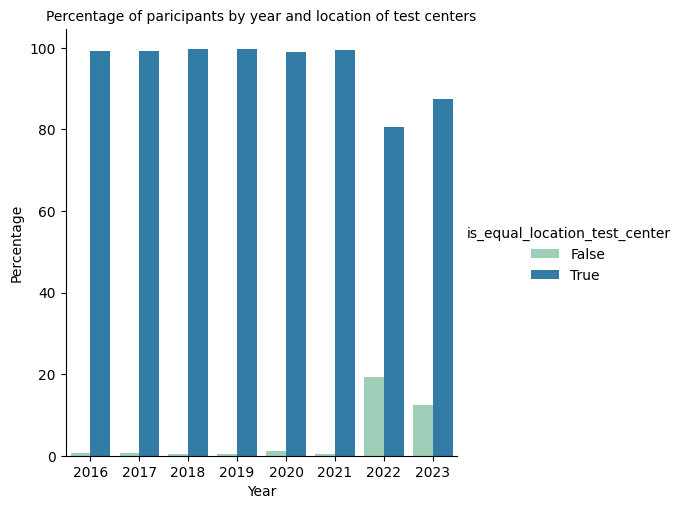

In [188]:
x,y = 'year', 'is_equal_location_test_center'

df_ukr_region.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title('Percentage of paricipants by year and location of test centers', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


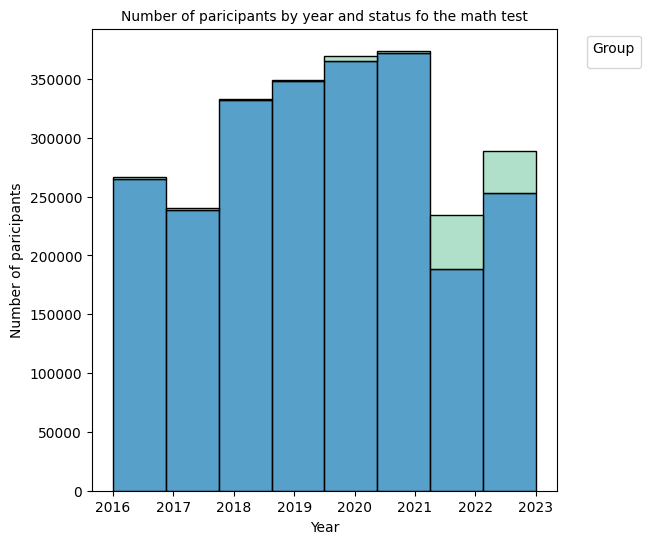

In [191]:
# set size of plot
plt.figure(figsize=(6, 6))

# viz as stack plot
sns.histplot(data=df_ukr_region, x='year', hue='is_equal_location_test_center', multiple='stack', palette='YlGnBu', shrink=1, bins=8)
plt.title('Number of paricipants by year and status fo the math test', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of paricipants', fontsize=10)
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [85]:
pd.pivot_table(df_ukr, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')

outid                                          \
year                      2016      2017      2018      2019      2020   
test_status                                                              
Absent                 13187.0    9992.0    9815.0    9980.0   95071.0   
Accepted              230634.0  212569.0  276433.0  286413.0  251929.0   
Canceled                 145.0     254.0     327.0     527.0      29.0   
Failed                 23033.0   17137.0   46598.0   52445.0   22525.0   
Not selected 100-200       NaN       NaN       NaN       NaN       NaN   

                                                    
year                      2021      2022      2023  
test_status                                         
Absent                 83321.0   19997.0   20716.0  
Accepted              267635.0  213927.0  267871.0  
Canceled                  93.0      33.0      91.0  
Failed                 21202.0     147.0     257.0  
Not selected 100-200    1712.0       NaN       NaN

In [86]:
df_ukr_region.region_name_test_center.unique()

array(['Odeska', 'Zhytomyrskа', 'Cherkaska', 'Kharkivska', 'Lvivska',
       'Donetska', 'Chernihivska', 'Sumska', 'Mykolaivska',
       'Chernivetska', 'Czechia', 'Dnipropetrovska', 'Rivnenska', 'Kyiv',
       'Khmelnytska', 'Zaporizka', 'Khersonska', 'Volynska', 'Poltavska',
       'Vinnytska', 'Zakarpatska', 'Kirovohradska', 'Austia',
       'Ternopilska', 'Kyivska', 'Ivano-Frankivska', 'Germany',
       'Luhanska', 'Lithuania', 'Slovakia', 'Poland', 'Canada', 'Italy',
       'United States of America', 'France', 'United Kingdom',
       'Switzerland', 'Bulgaria', 'Belgium', 'Hungary', 'Spain',
       'Ireland', 'Netherlands', 'Moldova', 'Estonia', 'Romania',
       'Portugal', 'Latvia', 'Luxembourg', 'Sweden', 'Denmark',
       'Slovenia', 'Croatia', 'Georgia', 'Greece', 'Finland', 'Turkey',
       'Norway', 'Azerbaijan'], dtype=object)

In [87]:
df_ukr_region['test_center_type'] = df_ukr_region.region_name_test_center.map(lambda x: 'frontline' if x in ['Dnipropetrovska', 'Donetska', 'Zaporizka', 'Luhanska', 'Mykolaivska', 'Odeska', 'Sumska', 'Kharkivska', 'Khersonska'] else ('abroad' if x in ['Czechia', 'Austia', 'Germany', 'Lithuania', 'Slovakia', 'Poland', 'Canada', 'Italy', 'United States of America', 'France', 'United Kingdom',
       'Switzerland', 'Bulgaria', 'Belgium', 'Hungary', 'Spain',
       'Ireland', 'Netherlands', 'Moldova', 'Estonia', 'Romania',
       'Portugal', 'Latvia', 'Luxembourg', 'Sweden', 'Denmark',
       'Slovenia', 'Croatia', 'Georgia', 'Greece', 'Finland', 'Turkey',
       'Norway', 'Azerbaijan'] else 'non-frontline'))

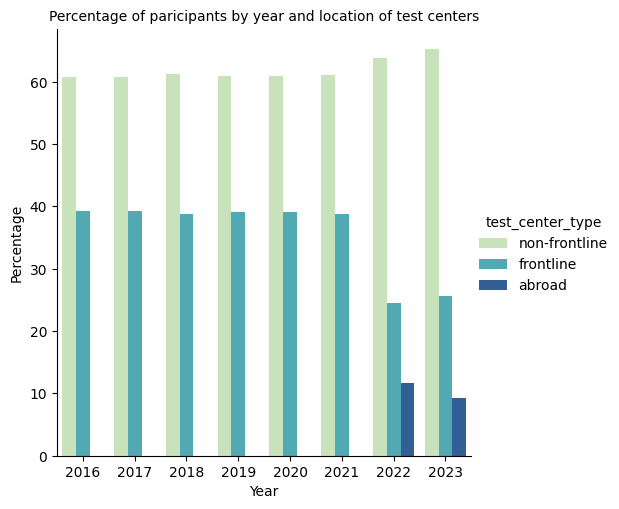

In [88]:
x,y = 'year', 'test_center_type'

df_ukr_region.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title('Percentage of paricipants by year and location of test centers', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [89]:
df_students_region

,outid,sextypename,year,EDRPOU_school,status,age,category,region_name,abroad,is_frontline,is_rural
0,a99c6c63-aa70-4aec-ba42-370f7261e857,Male,2016,26373098,A graduate of an Ukrainian school of the curre...,18,village,Zaporizka,0,yes,yes
1,c3136421-569e-422e-ae8f-41c4c931fd70,Female,2016,25880114,A graduate of an Ukrainian school of the curre...,18,city,Khmelnytska,0,no,no
2,30de395e-7a74-452a-8370-6856d240fbfb,Male,2016,21431046,A graduate of an Ukrainian school of the curre...,17,city,Chernivetska,0,no,no
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,Female,2016,25705061,A graduate of an Ukrainian school of the curre...,17,city,Donetska,0,yes,no
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,Male,2016,14040173,A graduate of an Ukrainian school of the curre...,17,city,Ternopilska,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,Male,2023,NaN,A graduate of previous years,20,city,Sumska,0,yes,no
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,Female,2023,NaN,A graduate of previous years,27,city,Kyivska,0,no,no
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,Female,2023,NaN,A graduate of previous years,19,city,Rivnenska,0,no,no
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,Female,2023,NaN,A graduate of previous years,18,districts in cities,Odeska,0,yes,no


In [90]:
df_ukr_region[df_ukr_region.year==2022].region_name_test_center.value_counts()

region_name_test_center
Dnipropetrovska             21146
Kyiv                        19129
Lvivska                     19027
Odeska                      13768
Kyivska                     12600
Vinnytska                   10332
Ivano-Frankivska             9151
Poltavska                    9042
Rivnenska                    8617
Khmelnytska                  8605
Poland                       8456
Zhytomyrskа                  7664
Volynska                     7598
Kharkivska                   7300
Germany                      7178
Ternopilska                  7171
Cherkaska                    7161
Zakarpatska                  6951
Sumska                       5925
Kirovohradska                5703
Chernihivska                 5503
Zaporizka                    5500
Chernivetska                 5236
Mykolaivska                  3584
Czechia                      2263
Italy                         978
Austia                        825
United Kingdom                759
France                  

In [91]:
df_ukr_region.columns

Index(['outid', 'year', 'score100', 'score12', 'score', 'test_status',
       'test_subject', 'test_type', 'KATOTTG_2023_test_center',
       'EDRPOU_test_center', 'sextypename', 'EDRPOU_school', 'status', 'age',
       'category', 'region_name', 'abroad', 'is_frontline', 'is_rural',
       'category_test_center', 'KATOTTG_2023_region_test_center',
       'region_name_test_center', 'is_frontline_test_center',
       'test_center_type'],
      dtype='object')

In [92]:
pd.pivot_table(df_ukr_region, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')

outid                                          \
year                      2016      2017      2018      2019      2020   
test_status                                                              
Absent                 13187.0    9992.0    9815.0    9980.0   95071.0   
Accepted              230634.0  212569.0  276433.0  286413.0  251929.0   
Canceled                 145.0     254.0     327.0     527.0      29.0   
Failed                 23033.0   17137.0   46598.0   52445.0   22525.0   
Not selected 100-200       NaN       NaN       NaN       NaN       NaN   

                                                    
year                      2021      2022      2023  
test_status                                         
Absent                 83321.0   19997.0   20716.0  
Accepted              267635.0  213927.0  267871.0  
Canceled                  93.0      33.0      91.0  
Failed                 21202.0     147.0     257.0  
Not selected 100-200    1712.0       NaN       NaN

In [93]:
df_ukr_region_scores = df_ukr_region[~df_ukr_region.test_status.isin(['Absent', 'Not selected 100-200'])]
df_ukr_region_scores

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,category,region_name,abroad,is_frontline,is_rural,category_test_center,KATOTTG_2023_region_test_center,region_name_test_center,is_frontline_test_center,test_center_type
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,...,districts in cities,Odeska,0,yes,no,districts in cities,UA51,Odeska,yes,frontline
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,...,districts in cities,Cherkaska,0,no,no,districts in cities,UA71,Cherkaska,no,non-frontline
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,...,districts in cities,Kharkivska,0,yes,no,districts in cities,UA63,Kharkivska,yes,frontline
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,...,city,Lvivska,0,no,no,city,UA46,Lvivska,no,non-frontline
5,0000333b-1b93-4386-a148-3d9613bbe324,2019,127.0,6.0,38.0,Accepted,ukrtest,EIE,UA14160210010099403,25701896,...,city,Donetska,0,yes,no,city,UA14,Donetska,yes,frontline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456038,ffffd378-2c03-407d-8937-3a4acca43f94,2019,127.0,6.0,38.0,Accepted,ukrtest,EIE,UA53020030010087471,21064435,...,village,Poltavska,0,no,yes,city,UA53,Poltavska,no,non-frontline
2456040,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,142.0,NaN,14.0,Accepted,ukrtest,NMT,UA18080150010017476,NaN,...,village,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа,no,non-frontline
2456041,ffffeeb2-7258-4465-bca3-88dd19902340,2019,169.0,10.0,70.0,Accepted,ukrtest,EIE,UA12020010010639502,26508368,...,districts in cities,Dnipropetrovska,0,yes,no,districts in cities,UA12,Dnipropetrovska,yes,frontline
2456043,fffff7dc-0331-41bb-aa5e-e51024ac605e,2021,128.0,NaN,31.0,Accepted,ukrtest,EIE,UA07080170010083384,23253324,...,city,Volynska,0,no,no,city,UA07,Volynska,no,non-frontline


In [94]:
pd.pivot_table(df_ukr_region_scores, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')

outid                                                        
year           2016    2017    2018    2019    2020    2021    2022    2023
test_status                                                                
Accepted     230634  212569  276433  286413  251929  267635  213927  267871
Canceled        145     254     327     527      29      93      33      91
Failed        23033   17137   46598   52445   22525   21202     147     257

In [95]:
df_ukr_region_scores['test_status'] = df_ukr_region_scores['test_status'].map(lambda x: 'Failed' if x == 'Canceled' else x)

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_53831/1548480736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukr_region_scores['test_status'] = df_ukr_region_scores['test_status'].map(lambda x: 'Failed' if x == 'Canceled' else x)


In [96]:
pivot = pd.pivot_table(df_ukr_region_scores, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')
pivot

outid                                                        
year           2016    2017    2018    2019    2020    2021    2022    2023
test_status                                                                
Accepted     230634  212569  276433  286413  251929  267635  213927  267871
Failed        23178   17391   46925   52972   22554   21295     180     348

In [97]:
total_pivot = [len(df_ukr_region_scores[df_ukr_region_scores['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                        
year         2016  2017  2018  2019  2020  2021 2022 2023
test_status                                              
Accepted     0.91  0.92  0.85  0.84  0.92  0.93  1.0  1.0
Failed       0.09  0.08  0.15  0.16  0.08  0.07  0.0  0.0

In [98]:
df_ukr_region_scores

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,category,region_name,abroad,is_frontline,is_rural,category_test_center,KATOTTG_2023_region_test_center,region_name_test_center,is_frontline_test_center,test_center_type
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,...,districts in cities,Odeska,0,yes,no,districts in cities,UA51,Odeska,yes,frontline
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,...,districts in cities,Cherkaska,0,no,no,districts in cities,UA71,Cherkaska,no,non-frontline
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,...,districts in cities,Kharkivska,0,yes,no,districts in cities,UA63,Kharkivska,yes,frontline
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,...,city,Lvivska,0,no,no,city,UA46,Lvivska,no,non-frontline
5,0000333b-1b93-4386-a148-3d9613bbe324,2019,127.0,6.0,38.0,Accepted,ukrtest,EIE,UA14160210010099403,25701896,...,city,Donetska,0,yes,no,city,UA14,Donetska,yes,frontline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456038,ffffd378-2c03-407d-8937-3a4acca43f94,2019,127.0,6.0,38.0,Accepted,ukrtest,EIE,UA53020030010087471,21064435,...,village,Poltavska,0,no,yes,city,UA53,Poltavska,no,non-frontline
2456040,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,142.0,NaN,14.0,Accepted,ukrtest,NMT,UA18080150010017476,NaN,...,village,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа,no,non-frontline
2456041,ffffeeb2-7258-4465-bca3-88dd19902340,2019,169.0,10.0,70.0,Accepted,ukrtest,EIE,UA12020010010639502,26508368,...,districts in cities,Dnipropetrovska,0,yes,no,districts in cities,UA12,Dnipropetrovska,yes,frontline
2456043,fffff7dc-0331-41bb-aa5e-e51024ac605e,2021,128.0,NaN,31.0,Accepted,ukrtest,EIE,UA07080170010083384,23253324,...,city,Volynska,0,no,no,city,UA07,Volynska,no,non-frontline


In [99]:
pivot1 = pd.pivot_table(df_ukr_region_scores[df_ukr_region_scores.score100!=0], index = ['region_name'], columns = ['year'], values=['score100'], aggfunc='mean')
pivot1

score100                                      \
year                            2016        2017        2018        2019   
region_name                                                                
Austia                           NaN         NaN         NaN         NaN   
Azerbaijan                       NaN         NaN         NaN         NaN   
Belgium                          NaN         NaN         NaN         NaN   
Bulgaria                         NaN         NaN         NaN         NaN   
Canada                           NaN         NaN         NaN         NaN   
Cherkaska                 146.988507  145.947073  145.602483  142.100199   
Chernihivska              144.957076  145.492305  144.031623  143.221067   
Chernivetska              137.229284  136.739154  134.485572  133.191265   
Croatia                          NaN         NaN         NaN         NaN   
Czechia                          NaN         NaN         NaN         NaN   
Denmark                          NaN         NaN         NaN         NaN   
Dnipropetrovska           144.603134  143.518526  142.581372  139.381358   
Donetska                  143.450861  142.532517  140.792538  139.321301   
Estonia                          NaN         NaN         NaN         NaN   
Finland                          NaN         NaN         NaN         NaN   
France                           NaN         NaN         NaN         NaN   
Georgia                          NaN         NaN         NaN         NaN   
Germany                          NaN         NaN         NaN         NaN   
Hungary                          NaN         NaN         NaN         NaN   
Ireland                          NaN         NaN         NaN         NaN   
Italy                            NaN         NaN         NaN         NaN   
Ivano-Frankivska          143.719105  145.882006  141.495088  140.306974   
Kharkivska                147.686174  145.417260  145.226685  144.122821   
Khersonska                139.972558  138.796302  138.509438  137.658023   
Khmelnytska               144.375064  144.460940  141.332616  140.454207   
Kirovohradska             142.049834  141.667666  139.772202  139.764688   
Kyiv                      155.920430  152.928968  149.069195  148.029060   
Kyivska                   146.754940  145.855912  144.393111  144.160484   
Latvia                           NaN         NaN         NaN         NaN   
Lithuania                        NaN         NaN         NaN         NaN   
Luhanska                  142.241918  139.942433  138.985140  138.631231   
Luxembourg                       NaN         NaN         NaN         NaN   
Lvivska                   154.195603  153.873833  149.856279  146.752461   
Moldova                          NaN         NaN         NaN         NaN   
Mykolaivska               141.878121  140.261645  138.308247  137.866720   
Netherlands                      NaN         NaN         NaN         NaN   
Norway                           NaN         NaN         NaN         NaN   
Odeska                    142.375750  140.491903  139.059726  137.605635   
Poland                           NaN         NaN         NaN         NaN   
Poltavska                 144.475591  144.205091  142.418054  141.144994   
Portugal                         NaN         NaN         NaN         NaN   
Rivnenska                 143.179269  142.661463  140.145077  139.107911   
Romania                          NaN         NaN         NaN         NaN   
Slovakia                         NaN         NaN         NaN         NaN   
Spain                            NaN         NaN         NaN         NaN   
Sumska                    146.480867  146.733714  142.897417  140.861546   
Sweden                           NaN         NaN         NaN         NaN   
Switzerland                      NaN         NaN         NaN         NaN   
Ternopilska               149.057116  148.409946  141.248339  141.193607   
Turkey                           NaN         NaN         NaN         NaN   


In [100]:
total_pivot = [len(df_ukr_region_scores[df_ukr_region_scores['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot1.div(total_pivot).round(2)

score100                                   
year                         2016 2017 2018 2019 2020 2021 2022 2023
region_name                                                         
Austia                        NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Azerbaijan                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Belgium                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Bulgaria                      NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Canada                        NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Cherkaska                     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Chernihivska                  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Chernivetska                  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Croatia                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Czechia                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Denmark                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Dnipropetrovska               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Donetska                      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Estonia                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Finland                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
France                        NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Georgia                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Germany                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Hungary                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Ireland                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Italy                         NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Ivano-Frankivska              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Kharkivska                    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Khersonska                    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Khmelnytska                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Kirovohradska                 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Kyiv                          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Kyivska                       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Latvia                        NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Lithuania                     NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Luhanska                      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Luxembourg                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Lvivska                       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Moldova                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Mykolaivska                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Netherlands                   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Norway                        NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Odeska                        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Poland                        NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Poltavska                     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Portugal                      NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Rivnenska                     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Romania                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Slovakia                      NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Spain                         NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Sumska                        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Sweden                        NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Switzerland                   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Ternopilska                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Turkey                        NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
United Kingdom                NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
United States of America      NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0
Vinnytska                     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Volynska                      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Zakarpatska                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Zaporizka              

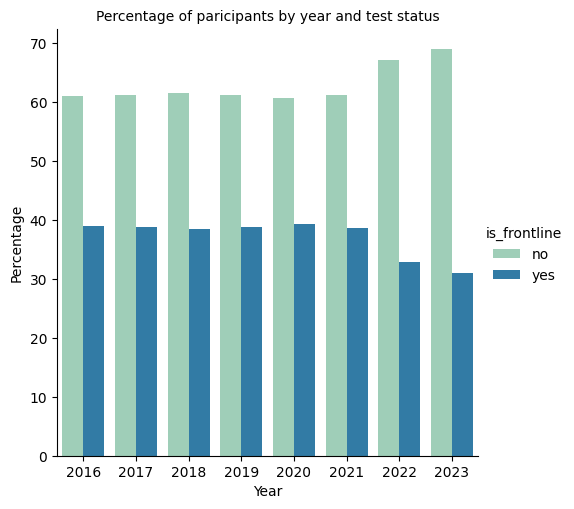

In [101]:
x,y = 'year', 'is_frontline'

df_ukr_region_scores.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue='is_frontline',kind='bar',palette='YlGnBu')

plt.title('Percentage of paricipants by year and test status', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

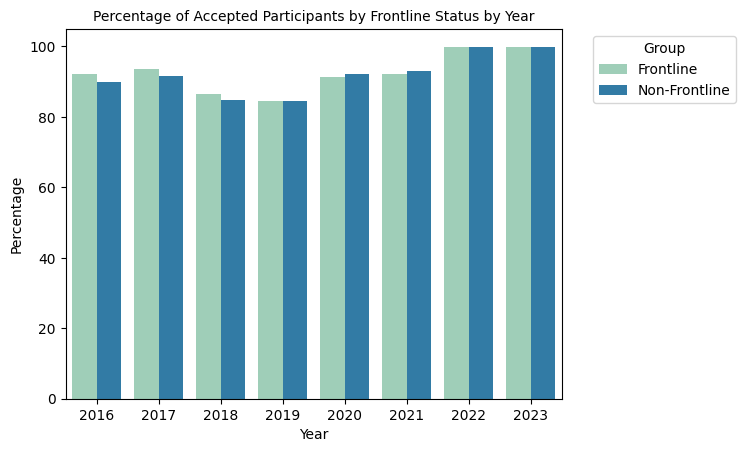

In [102]:
# Define variables
x = 'year'  # Year
y = 'test_status'  # Test status to check if accepted
group = 'is_frontline_test_center'  # Frontline status

# Function to calculate percentage of accepted for frontline/non-frontline
def calculate_accepted_percentage(group_df):
    return group_df.groupby(x)[y].apply(lambda x: (x == 'Accepted').mean() * 100).reset_index(name='percent')

# Separate the data into frontline and non-frontline
frontline_df = df_ukr_region_scores[df_ukr_region_scores[group] == 'yes']
non_frontline_df = df_ukr_region_scores[df_ukr_region_scores[group] == 'no']

# Calculate percentages
frontline_percent = calculate_accepted_percentage(frontline_df)
non_frontline_percent = calculate_accepted_percentage(non_frontline_df)

# Add a column to distinguish between frontline and non-frontline
frontline_percent['Group'] = 'Frontline'
non_frontline_percent['Group'] = 'Non-Frontline'

# Combine the data
combined_percent = pd.concat([frontline_percent, non_frontline_percent])

# Plotting the results
sns.barplot(data=combined_percent, x=x, y='percent', hue='Group', palette='YlGnBu')
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Percentage of Accepted Participants by Frontline Status by Year', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


In [103]:
df_ukr_region_scores

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,category,region_name,abroad,is_frontline,is_rural,category_test_center,KATOTTG_2023_region_test_center,region_name_test_center,is_frontline_test_center,test_center_type
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,...,districts in cities,Odeska,0,yes,no,districts in cities,UA51,Odeska,yes,frontline
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,...,districts in cities,Cherkaska,0,no,no,districts in cities,UA71,Cherkaska,no,non-frontline
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,...,districts in cities,Kharkivska,0,yes,no,districts in cities,UA63,Kharkivska,yes,frontline
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,...,city,Lvivska,0,no,no,city,UA46,Lvivska,no,non-frontline
5,0000333b-1b93-4386-a148-3d9613bbe324,2019,127.0,6.0,38.0,Accepted,ukrtest,EIE,UA14160210010099403,25701896,...,city,Donetska,0,yes,no,city,UA14,Donetska,yes,frontline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456038,ffffd378-2c03-407d-8937-3a4acca43f94,2019,127.0,6.0,38.0,Accepted,ukrtest,EIE,UA53020030010087471,21064435,...,village,Poltavska,0,no,yes,city,UA53,Poltavska,no,non-frontline
2456040,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,142.0,NaN,14.0,Accepted,ukrtest,NMT,UA18080150010017476,NaN,...,village,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа,no,non-frontline
2456041,ffffeeb2-7258-4465-bca3-88dd19902340,2019,169.0,10.0,70.0,Accepted,ukrtest,EIE,UA12020010010639502,26508368,...,districts in cities,Dnipropetrovska,0,yes,no,districts in cities,UA12,Dnipropetrovska,yes,frontline
2456043,fffff7dc-0331-41bb-aa5e-e51024ac605e,2021,128.0,NaN,31.0,Accepted,ukrtest,EIE,UA07080170010083384,23253324,...,city,Volynska,0,no,no,city,UA07,Volynska,no,non-frontline


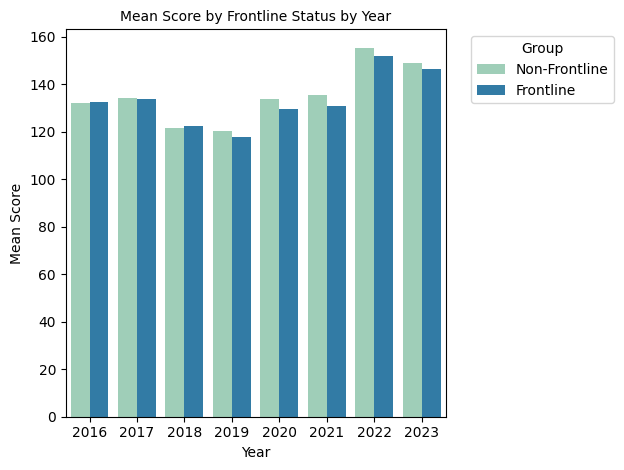

In [104]:

# Define variables
x = 'year'  # Year
score_col = 'score100'  # Score column to calculate mean
group = 'is_frontline_test_center'  # Frontline status

# Group the data by year and frontline status, then calculate mean score
mean_scores = df_ukr_region_scores.groupby([x, group])[score_col].mean().reset_index()

# Rename the 'is_frontline' column values for clarity
mean_scores[group] = mean_scores[group].map({'yes': 'Frontline', 'no': 'Non-Frontline'})

# Plotting the results
sns.barplot(data=mean_scores, x=x, y=score_col, hue=group, palette='YlGnBu')

plt.title('Mean Score by Frontline Status by Year', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Mean Score', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Move the legend outside the plot
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

plt.show()


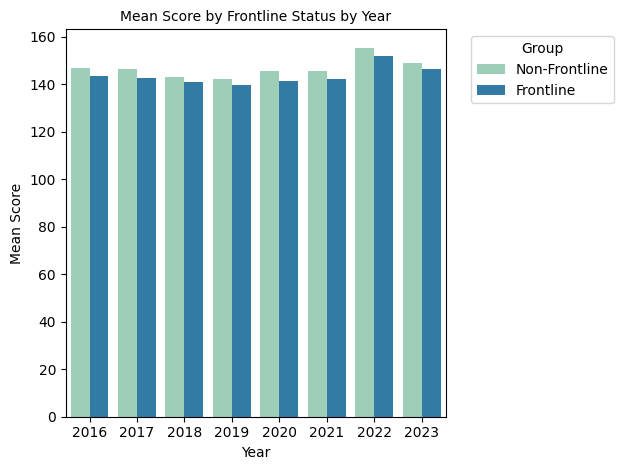

In [105]:

# Define variables
x = 'year'  # Year
score_col = 'score100'  # Score column to calculate mean
group = 'is_frontline_test_center'  # Frontline status

# Group the data by year and frontline status, then calculate mean score
mean_scores = df_ukr_region_scores[df_ukr_region_scores.score100 != 0].groupby([x, group])[score_col].mean().reset_index()

# Rename the 'is_frontline' column values for clarity
mean_scores[group] = mean_scores[group].map({'yes': 'Frontline', 'no': 'Non-Frontline'})

# Plotting the results
sns.barplot(data=mean_scores, x=x, y=score_col, hue=group, palette='YlGnBu')

plt.title('Mean Score by Frontline Status by Year', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Mean Score', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Move the legend outside the plot
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

plt.show()


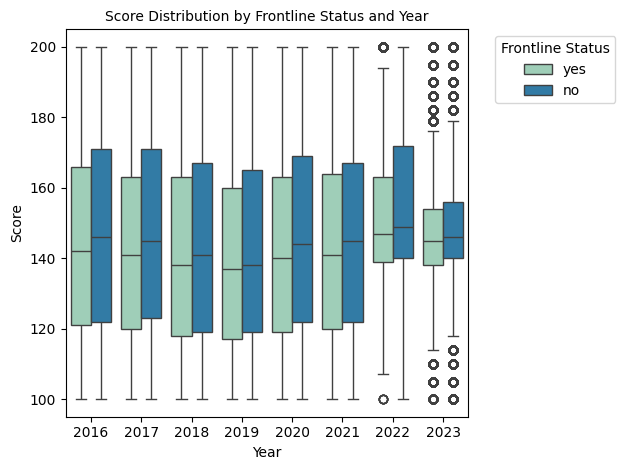

In [106]:


# Use seaborn boxplot to plot the scores
sns.boxplot(data=df_ukr_region_scores[df_ukr_region_scores.score100 != 0], x='year', y='score100', hue='is_frontline_test_center', palette='YlGnBu')

plt.title('Score Distribution by Frontline Status and Year', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Move the legend outside the plot
plt.legend(title='Frontline Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

plt.show()


### Math

In [107]:
df_math = df[df.test_subject == 'mathtest']
sum(df_math.duplicated())

0

In [108]:
pd.pivot_table(df_math, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')

outid                                        \
year                      2016     2017     2018      2019      2020   
test_status                                                            
Absent                  9117.0   6795.0   5539.0    5463.0   33991.0   
Accepted              104797.0  88814.0  86692.0  127093.0  132734.0   
Canceled                 142.0     57.0    111.0     117.0      34.0   
Failed                 18108.0  17454.0  19681.0   28109.0   19313.0   
Not selected 100-200       NaN      NaN      NaN       NaN       NaN   

                                                    
year                      2021      2022      2023  
test_status                                         
Absent                 47247.0   19997.0   20716.0  
Accepted              168369.0  213805.0  256741.0  
Canceled                 208.0      33.0      91.0  
Failed                 75833.0     269.0   11387.0  
Not selected 100-200     132.0       NaN       NaN

In [109]:
df_location_ukr.head()

,KATOTTG_2023_test_center,KOATUU_2020,category_test_center,ukrainian_name,english_name
0,UA01000000000013043,0100000000,region,Автономна Республіка Крим,Avtonomna Respublika Krym
1,UA01020000000022387,0120400000,district,Бахчисарайський,Bakhchysaraiskyi
2,UA01020010000048857,8536990200,hromada,Андріївська,NaN
3,UA01020010010075540,8536990201,village,Андріївка,NaN
4,UA01020010020030666,8536990203,settlement,Сонячний,NaN


In [110]:
df_math_region = df_math.merge(df_location_ukr[['KATOTTG_2023_test_center', 'category_test_center']], on = ['KATOTTG_2023_test_center'], how = 'left')


In [111]:
df_math_region['KATOTTG_2023_region_test_center']=df_math_region['KATOTTG_2023_test_center'].str[:4]
df_math_region

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,EDRPOU_school,status,age,category,region_name,abroad,is_frontline,is_rural,category_test_center,KATOTTG_2023_region_test_center
0,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,mathtest,EIE,UA18060090010074365,22050043,...,22056432,A graduate of an Ukrainian school of the curre...,17,village,Zhytomyrskа,0,no,yes,city,UA18
1,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,181.0,11.0,NaN,Accepted,mathtest,EIE,UA63120270010948820,02071197,...,23320374,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kharkivska,0,yes,no,districts in cities,UA63
2,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,172.0,9.0,42.0,Accepted,mathtest,EIE,UA46100230010074173,02545471,...,20773804,A graduate of an Ukrainian school of the curre...,17,city,Lvivska,0,no,no,city,UA46
3,0000333c-efa3-42a7-9f45-e77b53346d57,2020,117.0,5.0,14.0,Accepted,mathtest,EIE,UA14120090010038661,25704570,...,04601943,A graduate of a vocational pre-higher educatio...,18,city,Donetska,0,yes,no,city,UA14
4,00004713-8ed1-4ffa-a082-b6b3acf03b67,2020,103.0,4.0,10.0,Accepted,mathtest,EIE,UA46060250010515336,25245257,...,02545659,A graduate of a vocational pre-higher educatio...,19,districts in cities,Lvivska,0,no,no,districts in cities,UA46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518984,ffffb2e5-b2a1-4f51-871b-d281c20e72e8,2019,104.0,4.0,12.0,Accepted,mathtest,EIE,UA32080090010037585,25668443,...,25667248,A graduate of an Ukrainian school of the curre...,17,village,Kyivska,0,no,yes,city,UA32
1518985,ffffbfa2-b0c2-4807-9eff-eb62e1b7a2d0,2016,NaN,NaN,NaN,Absent,mathtest,EIE,UA51100270010275193,25428236,...,NaN,A graduate of previous years,18,districts in cities,Odeska,0,yes,no,districts in cities,UA51
1518986,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,128.0,NaN,5.0,Accepted,mathtest,NMT,UA18080150010017476,NaN,...,00727989,A graduate of a vocational pre-higher educatio...,17,village,Zhytomyrskа,0,no,yes,city,UA18
1518987,ffffeeb2-7258-4465-bca3-88dd19902340,2019,180.0,10.0,46.0,Accepted,mathtest,EIE,UA12020010010639502,26508368,...,26509416,A graduate of an Ukrainian school of the curre...,17,districts in cities,Dnipropetrovska,0,yes,no,districts in cities,UA12


In [112]:
df_math_region = df_math_region.merge(region_df_ukr, on = ['KATOTTG_2023_region_test_center'], how = 'left')
df_math_region

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,status,age,category,region_name,abroad,is_frontline,is_rural,category_test_center,KATOTTG_2023_region_test_center,english_name
0,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,mathtest,EIE,UA18060090010074365,22050043,...,A graduate of an Ukrainian school of the curre...,17,village,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа
1,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,181.0,11.0,NaN,Accepted,mathtest,EIE,UA63120270010948820,02071197,...,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kharkivska,0,yes,no,districts in cities,UA63,Kharkivska
2,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,172.0,9.0,42.0,Accepted,mathtest,EIE,UA46100230010074173,02545471,...,A graduate of an Ukrainian school of the curre...,17,city,Lvivska,0,no,no,city,UA46,Lvivska
3,0000333c-efa3-42a7-9f45-e77b53346d57,2020,117.0,5.0,14.0,Accepted,mathtest,EIE,UA14120090010038661,25704570,...,A graduate of a vocational pre-higher educatio...,18,city,Donetska,0,yes,no,city,UA14,Donetska
4,00004713-8ed1-4ffa-a082-b6b3acf03b67,2020,103.0,4.0,10.0,Accepted,mathtest,EIE,UA46060250010515336,25245257,...,A graduate of a vocational pre-higher educatio...,19,districts in cities,Lvivska,0,no,no,districts in cities,UA46,Lvivska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518984,ffffb2e5-b2a1-4f51-871b-d281c20e72e8,2019,104.0,4.0,12.0,Accepted,mathtest,EIE,UA32080090010037585,25668443,...,A graduate of an Ukrainian school of the curre...,17,village,Kyivska,0,no,yes,city,UA32,Kyivska
1518985,ffffbfa2-b0c2-4807-9eff-eb62e1b7a2d0,2016,NaN,NaN,NaN,Absent,mathtest,EIE,UA51100270010275193,25428236,...,A graduate of previous years,18,districts in cities,Odeska,0,yes,no,districts in cities,UA51,Odeska
1518986,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,128.0,NaN,5.0,Accepted,mathtest,NMT,UA18080150010017476,NaN,...,A graduate of a vocational pre-higher educatio...,17,village,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа
1518987,ffffeeb2-7258-4465-bca3-88dd19902340,2019,180.0,10.0,46.0,Accepted,mathtest,EIE,UA12020010010639502,26508368,...,A graduate of an Ukrainian school of the curre...,17,districts in cities,Dnipropetrovska,0,yes,no,districts in cities,UA12,Dnipropetrovska


In [113]:
df_math_region = df_math_region.merge(abroad_df_ukr, on = ['KATOTTG_2023_region_test_center'], how = 'left')
df_math_region 

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,age,category,region_name,abroad,is_frontline,is_rural,category_test_center,KATOTTG_2023_region_test_center,english_name_x,english_name_y
0,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,mathtest,EIE,UA18060090010074365,22050043,...,17,village,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа,NaN
1,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,181.0,11.0,NaN,Accepted,mathtest,EIE,UA63120270010948820,02071197,...,18,districts in cities,Kharkivska,0,yes,no,districts in cities,UA63,Kharkivska,NaN
2,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,172.0,9.0,42.0,Accepted,mathtest,EIE,UA46100230010074173,02545471,...,17,city,Lvivska,0,no,no,city,UA46,Lvivska,NaN
3,0000333c-efa3-42a7-9f45-e77b53346d57,2020,117.0,5.0,14.0,Accepted,mathtest,EIE,UA14120090010038661,25704570,...,18,city,Donetska,0,yes,no,city,UA14,Donetska,NaN
4,00004713-8ed1-4ffa-a082-b6b3acf03b67,2020,103.0,4.0,10.0,Accepted,mathtest,EIE,UA46060250010515336,25245257,...,19,districts in cities,Lvivska,0,no,no,districts in cities,UA46,Lvivska,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518984,ffffb2e5-b2a1-4f51-871b-d281c20e72e8,2019,104.0,4.0,12.0,Accepted,mathtest,EIE,UA32080090010037585,25668443,...,17,village,Kyivska,0,no,yes,city,UA32,Kyivska,NaN
1518985,ffffbfa2-b0c2-4807-9eff-eb62e1b7a2d0,2016,NaN,NaN,NaN,Absent,mathtest,EIE,UA51100270010275193,25428236,...,18,districts in cities,Odeska,0,yes,no,districts in cities,UA51,Odeska,NaN
1518986,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,128.0,NaN,5.0,Accepted,mathtest,NMT,UA18080150010017476,NaN,...,17,village,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа,NaN
1518987,ffffeeb2-7258-4465-bca3-88dd19902340,2019,180.0,10.0,46.0,Accepted,mathtest,EIE,UA12020010010639502,26508368,...,17,districts in cities,Dnipropetrovska,0,yes,no,districts in cities,UA12,Dnipropetrovska,NaN


In [114]:
df_math_region.loc[df_math_region.english_name_x.isna(), 'english_name_x'] =df_math_region.english_name_y

In [115]:
df_math_region.drop(columns='english_name_y', inplace=True)
df_math_region.rename(columns={'english_name_x':'region_name_test_center'}, inplace=True)
df_math_region

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,status,age,category,region_name,abroad,is_frontline,is_rural,category_test_center,KATOTTG_2023_region_test_center,region_name_test_center
0,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,mathtest,EIE,UA18060090010074365,22050043,...,A graduate of an Ukrainian school of the curre...,17,village,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа
1,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,181.0,11.0,NaN,Accepted,mathtest,EIE,UA63120270010948820,02071197,...,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kharkivska,0,yes,no,districts in cities,UA63,Kharkivska
2,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,172.0,9.0,42.0,Accepted,mathtest,EIE,UA46100230010074173,02545471,...,A graduate of an Ukrainian school of the curre...,17,city,Lvivska,0,no,no,city,UA46,Lvivska
3,0000333c-efa3-42a7-9f45-e77b53346d57,2020,117.0,5.0,14.0,Accepted,mathtest,EIE,UA14120090010038661,25704570,...,A graduate of a vocational pre-higher educatio...,18,city,Donetska,0,yes,no,city,UA14,Donetska
4,00004713-8ed1-4ffa-a082-b6b3acf03b67,2020,103.0,4.0,10.0,Accepted,mathtest,EIE,UA46060250010515336,25245257,...,A graduate of a vocational pre-higher educatio...,19,districts in cities,Lvivska,0,no,no,districts in cities,UA46,Lvivska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518984,ffffb2e5-b2a1-4f51-871b-d281c20e72e8,2019,104.0,4.0,12.0,Accepted,mathtest,EIE,UA32080090010037585,25668443,...,A graduate of an Ukrainian school of the curre...,17,village,Kyivska,0,no,yes,city,UA32,Kyivska
1518985,ffffbfa2-b0c2-4807-9eff-eb62e1b7a2d0,2016,NaN,NaN,NaN,Absent,mathtest,EIE,UA51100270010275193,25428236,...,A graduate of previous years,18,districts in cities,Odeska,0,yes,no,districts in cities,UA51,Odeska
1518986,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,128.0,NaN,5.0,Accepted,mathtest,NMT,UA18080150010017476,NaN,...,A graduate of a vocational pre-higher educatio...,17,village,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа
1518987,ffffeeb2-7258-4465-bca3-88dd19902340,2019,180.0,10.0,46.0,Accepted,mathtest,EIE,UA12020010010639502,26508368,...,A graduate of an Ukrainian school of the curre...,17,districts in cities,Dnipropetrovska,0,yes,no,districts in cities,UA12,Dnipropetrovska


In [116]:
df_math_region['is_frontline_test_center'] = df_math_region.region_name_test_center.map(lambda x: 'yes' if x in ['Dnipropetrovska', 'Donetska', 'Zaporizka', 'Luhanska', 'Mykolaivska', 'Odeska', 'Sumska', 'Kharkivska', 'Khersonska'] else 'no')

In [117]:
df_math_region_ukr= df_math_region[df_math_region.KATOTTG_2023_region_test_center.str.startswith('UA')]

In [118]:
pivot = pd.pivot_table(df_math_region_ukr, index = ['is_frontline_test_center'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(df_math_region_ukr[df_math_region_ukr['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                          
year                      2016  2017  2018  2019  2020  2021  2022  2023
is_frontline_test_center                                                
no                        0.55  0.55  0.55  0.56  0.56  0.61  0.72  0.72
yes                       0.45  0.45  0.45  0.44  0.44  0.39  0.28  0.28

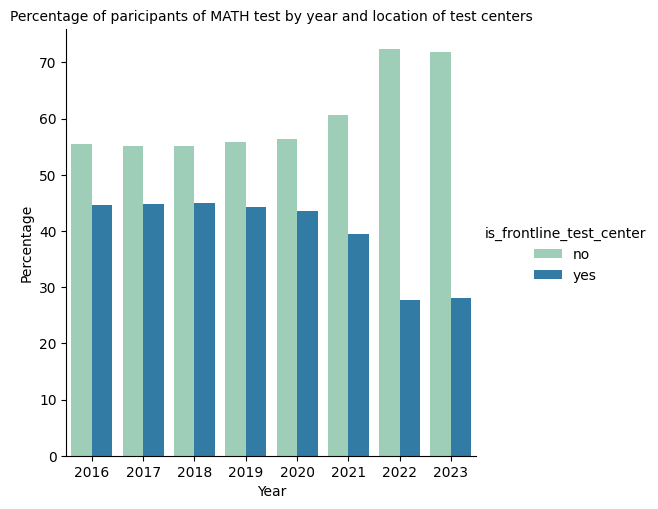

In [119]:
x,y = 'year', 'is_frontline_test_center'

df_math_region_ukr.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title('Percentage of paricipants of MATH test by year and location of test centers', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [120]:
pd.pivot_table(df_math_region_ukr, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')

outid                                        \
year                      2016     2017     2018      2019      2020   
test_status                                                            
Absent                  9117.0   6795.0   5539.0    5463.0   33991.0   
Accepted              104797.0  88814.0  86692.0  127093.0  132734.0   
Canceled                 142.0     57.0    111.0     117.0      34.0   
Failed                 18108.0  17454.0  19681.0   28109.0   19313.0   
Not selected 100-200       NaN      NaN      NaN       NaN       NaN   

                                                    
year                      2021      2022      2023  
test_status                                         
Absent                 47247.0   15694.0   16561.0  
Accepted              168369.0  190741.0  234810.0  
Canceled                 208.0      21.0      77.0  
Failed                 75833.0     257.0   10793.0  
Not selected 100-200     132.0       NaN       NaN

In [121]:
df_math_region_ukr_scores = df_math_region_ukr[~df_math_region_ukr.test_status.isin(['Absent', 'Not selected 100-200'])]
df_math_region_ukr_scores

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,age,category,region_name,abroad,is_frontline,is_rural,category_test_center,KATOTTG_2023_region_test_center,region_name_test_center,is_frontline_test_center
1,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,181.0,11.0,NaN,Accepted,mathtest,EIE,UA63120270010948820,02071197,...,18,districts in cities,Kharkivska,0,yes,no,districts in cities,UA63,Kharkivska,yes
2,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,172.0,9.0,42.0,Accepted,mathtest,EIE,UA46100230010074173,02545471,...,17,city,Lvivska,0,no,no,city,UA46,Lvivska,no
3,0000333c-efa3-42a7-9f45-e77b53346d57,2020,117.0,5.0,14.0,Accepted,mathtest,EIE,UA14120090010038661,25704570,...,18,city,Donetska,0,yes,no,city,UA14,Donetska,yes
4,00004713-8ed1-4ffa-a082-b6b3acf03b67,2020,103.0,4.0,10.0,Accepted,mathtest,EIE,UA46060250010515336,25245257,...,19,districts in cities,Lvivska,0,no,no,districts in cities,UA46,Lvivska,no
5,000051f8-9476-49b5-83c2-4797a201b706,2021,133.0,6.0,21.0,Accepted,mathtest,EIE,UA46120090010078401,22375166,...,18,village,Lvivska,0,no,yes,city,UA46,Lvivska,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518983,ffff8e58-5322-4b21-a385-d1fee504c2a8,2021,122.0,5.0,16.0,Accepted,mathtest,EIE,UA51040010010048834,00728546,...,17,city,Odeska,0,yes,no,city,UA51,Odeska,yes
1518984,ffffb2e5-b2a1-4f51-871b-d281c20e72e8,2019,104.0,4.0,12.0,Accepted,mathtest,EIE,UA32080090010037585,25668443,...,17,village,Kyivska,0,no,yes,city,UA32,Kyivska,no
1518986,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,128.0,NaN,5.0,Accepted,mathtest,NMT,UA18080150010017476,NaN,...,17,village,Zhytomyrskа,0,no,yes,city,UA18,Zhytomyrskа,no
1518987,ffffeeb2-7258-4465-bca3-88dd19902340,2019,180.0,10.0,46.0,Accepted,mathtest,EIE,UA12020010010639502,26508368,...,17,districts in cities,Dnipropetrovska,0,yes,no,districts in cities,UA12,Dnipropetrovska,yes


In [122]:
pd.pivot_table(df_math_region_ukr_scores, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')

outid                                                      
year           2016   2017   2018    2019    2020    2021    2022    2023
test_status                                                              
Accepted     104797  88814  86692  127093  132734  168369  190741  234810
Canceled        142     57    111     117      34     208      21      77
Failed        18108  17454  19681   28109   19313   75833     257   10793

In [123]:
df_math_region_ukr_scores['test_status'] = df_math_region_ukr_scores['test_status'].map(lambda x: 'Failed' if x == 'Canceled' else x)

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_53831/3572206725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math_region_ukr_scores['test_status'] = df_math_region_ukr_scores['test_status'].map(lambda x: 'Failed' if x == 'Canceled' else x)


In [124]:
pivot = pd.pivot_table(df_math_region_ukr_scores, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')
pivot

outid                                                      
year           2016   2017   2018    2019    2020    2021    2022    2023
test_status                                                              
Accepted     104797  88814  86692  127093  132734  168369  190741  234810
Failed        18250  17511  19792   28226   19347   76041     278   10870

In [125]:
total_pivot = [len(df_math_region_ukr_scores[df_math_region_ukr_scores['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                         
year         2016  2017  2018  2019  2020  2021 2022  2023
test_status                                               
Accepted     0.85  0.84  0.81  0.82  0.87  0.69  1.0  0.96
Failed       0.15  0.16  0.19  0.18  0.13  0.31  0.0  0.04

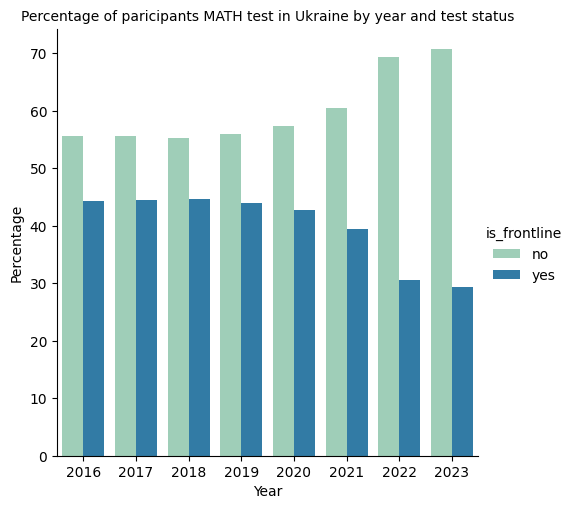

In [126]:
x,y = 'year', 'is_frontline'

df_math_region_ukr_scores.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue='is_frontline',kind='bar',palette='YlGnBu')

plt.title('Percentage of paricipants MATH test in Ukraine by year and test status', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

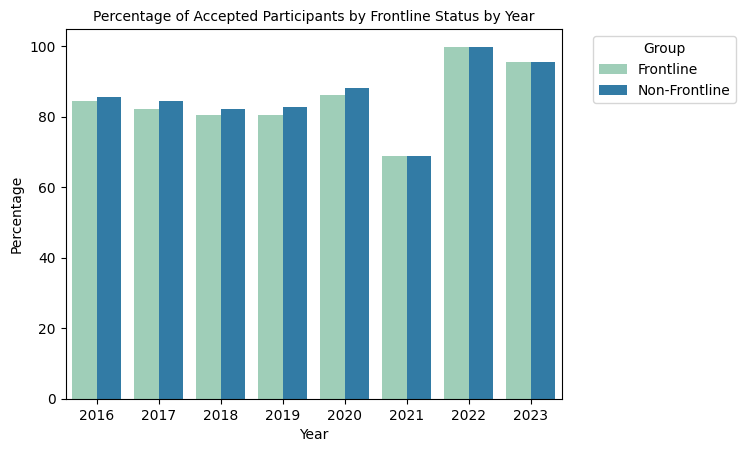

In [127]:
# Define variables
x = 'year'  # Year
y = 'test_status'  # Test status to check if accepted
group = 'is_frontline_test_center'  # Frontline status

# Function to calculate percentage of accepted for frontline/non-frontline
def calculate_accepted_percentage(group_df):
    return group_df.groupby(x)[y].apply(lambda x: (x == 'Accepted').mean() * 100).reset_index(name='percent')

# Separate the data into frontline and non-frontline
frontline_df = df_math_region_ukr_scores[df_math_region_ukr_scores[group] == 'yes']
non_frontline_df = df_math_region_ukr_scores[df_math_region_ukr_scores[group] == 'no']

# Calculate percentages
frontline_percent = calculate_accepted_percentage(frontline_df)
non_frontline_percent = calculate_accepted_percentage(non_frontline_df)

# Add a column to distinguish between frontline and non-frontline
frontline_percent['Group'] = 'Frontline'
non_frontline_percent['Group'] = 'Non-Frontline'

# Combine the data
combined_percent = pd.concat([frontline_percent, non_frontline_percent])

# Plotting the results
sns.barplot(data=combined_percent, x=x, y='percent', hue='Group', palette='YlGnBu')
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Percentage of Accepted Participants by Frontline Status by Year', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

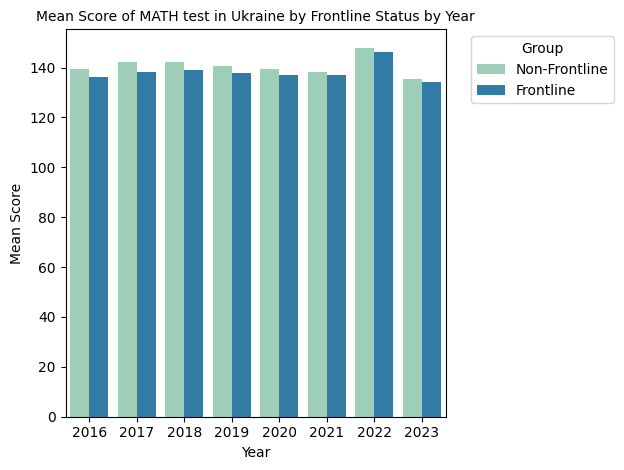

In [128]:

# Define variables
x = 'year'  # Year
score_col = 'score100'  # Score column to calculate mean
group = 'is_frontline_test_center'  # Frontline status

# Group the data by year and frontline status, then calculate mean score
mean_scores = df_math_region_ukr_scores[df_math_region_ukr_scores.score100 != 0].groupby([x, group])[score_col].mean().reset_index()

# Rename the 'is_frontline' column values for clarity
mean_scores[group] = mean_scores[group].map({'yes': 'Frontline', 'no': 'Non-Frontline'})

# Plotting the results
sns.barplot(data=mean_scores, x=x, y=score_col, hue=group, palette='YlGnBu')

plt.title('Mean Score of MATH test in Ukraine by Frontline Status by Year', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Mean Score', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Move the legend outside the plot
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

plt.show()


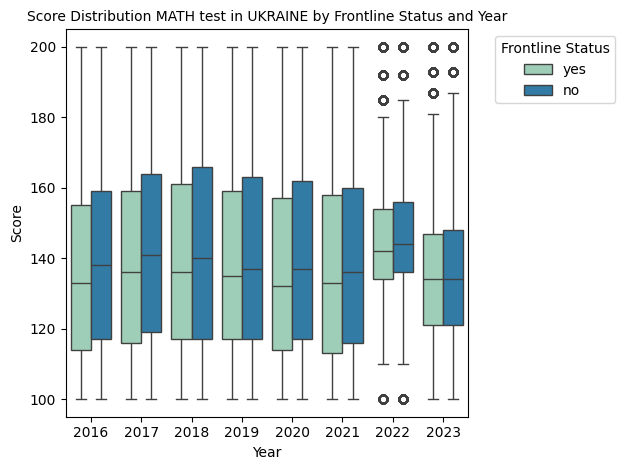

In [129]:


# Use seaborn boxplot to plot the scores
sns.boxplot(data=df_math_region_ukr_scores[df_math_region_ukr_scores.score100 != 0], x='year', y='score100', hue='is_frontline_test_center', palette='YlGnBu')

plt.title('Score Distribution MATH test in UKRAINE by Frontline Status and Year', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Move the legend outside the plot
plt.legend(title='Frontline Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

plt.show()
